# Заняття 11

## Мета:
Застосувати варіаційний автокодер (VAE) до реального набору даних для вивчення його здатності відновлювати та генерувати нові приклади, а також провести аналіз результатів.


## Кроки для виконання завдання:

### 1. Вибір та підготовка набору даних:
- Оберіть реальний набір даних, який підходить для задачі автокодера, наприклад:
  - **Зображення**: зображення облич (наприклад, CelebA), об'єкти (наприклад, CIFAR-10) або зображення одягу (наприклад, Fashion MNIST).
  - **Текст**: виберіть набір даних текстів або документів для VAE, адаптованого для тексту.
- Завантажте та підготуйте дані (наприклад, зведіть зображення до однакового розміру або виконайте попередню обробку тексту).


### 2. Попередня обробка даних:
- Для зображень нормалізуйте пікселі до діапазону [0, 1] або [-1, 1] для кращої стабільності навчання.
- Якщо працюєте з текстом, конвертуйте слова або символи в числові вектори (наприклад, за допомогою вбудованих методів токенізації та векторизації).


### 3. Реалізація архітектури VAE:
#### Енкодер:
- Створіть енкодер, що витягує основні ознаки з вхідних даних та перетворює їх у латентний простір.
- Визначте два вихідні шари для середнього значення (mean) та стандартного відхилення (logvar) латентного простору.

#### Вибірка з латентного простору:
- Реалізуйте шар вибірки, що використовує mean і logvar для генерації випадкових точок у латентному просторі.

#### Декодер:
- Створіть декодер, який приймає точки з латентного простору та реконструює оригінальні дані.
- Використайте згорткові або повнозв’язні шари в залежності від типу даних.


### 4. Налаштування функцій втрат:
- Використовуйте **реконструктивну втрату** (наприклад, mean squared error для зображень або binary cross-entropy для бінарних даних).
- Додайте **KL-дивергенцію** для контролю латентного простору, щоб він наближався до нормального розподілу.
- Об'єднайте обидві втрати, щоб сформувати загальну функцію втрат.


### 5. Навчання моделі:
1. Розділіть дані на навчальну та тестову вибірки.
2. Навчіть VAE на навчальній вибірці, оптимізуючи загальну функцію втрат (наприклад, з використанням оптимізатора Adam).
3. Після кожної епохи оцінюйте функцію втрат на тестовій вибірці для моніторингу навчання.


### 6. Генерація нових даних:
- Згенеруйте нові приклади, вибравши випадкові точки в латентному просторі та пропустивши їх через декодер.
- Збережіть або візуалізуйте згенеровані приклади для оцінки якості.


### 7. Аналіз результатів:
- Порівняйте оригінальні та відновлені зображення (або інші дані), щоб оцінити здатність VAE до відновлення даних.
- Виміряйте якість згенерованих даних, використовуючи метрики якості (наприклад, SSIM або PSNR для зображень).
- Проведіть аналіз латентного простору, щоб зрозуміти, чи вловив він основні ознаки даних (можна побудувати графіки латентного простору, якщо латентний простір має низьку розмірність).


### 8. Документування висновків:
- Опишіть ефективність VAE в задачі відновлення та генерації нових даних.
- Зазначте, чи вдалося моделі добре відновлювати та генерувати дані, і які аспекти потребують покращення.
- Розгляньте можливі покращення, як-от зміну архітектури або налаштування параметрів.


## Мінімальні вимоги:
- Реалізувати VAE для реального набору даних.
- Оцінити якість відновлених та згенерованих даних за допомогою візуалізацій або метрик.


## Додаткові рекомендації:
- Експериментуйте з розміром латентного простору та архітектурою, щоб знайти оптимальні налаштування для вашого набору даних.
- Використовуйте різні метрики для глибшого аналізу якості відновлення та генерації.


## UTILS

Цей код виконує наступні дії:

1. **Імпортує основні бібліотеки**:  
   - `numpy` і `matplotlib` для роботи з масивами та візуалізації.  
   - `tensorflow` і `keras` для створення моделей машинного навчання.

2. **Імпортує метрики для оцінки якості зображень**:  
   - `SSIM` (Structural Similarity Index) і `PSNR` (Peak Signal-to-Noise Ratio) для оцінки схожості зображень.  

3. **Імпортує попередньо навчені моделі**:  
   - `InceptionV3` і `VGG16` для екстракції ознак зображень.  
   - `LogisticRegression` для класифікації.  

4. **Імпортує інструменти для розрахунків**:  
   - Метрики помилок (MSE, MAE).  
   - Функції для обчислення ентропії, парних відстаней і квадратного кореня матриці (для FID).  

Це підготовчий блок для аналізу, оцінки та обробки зображень із використанням моделей та метрик.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Для метрик SSIM та PSNR
from skimage.metrics import structural_similarity as ssim_metric
from skimage.metrics import peak_signal_noise_ratio as psnr_metric

from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, pairwise_distances
from scipy.linalg import sqrtm
from scipy.stats import entropy
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

### MERTICS

#### PLOT

Цей код визначає кілька функцій для візуалізації та аналізу результатів роботи VAE:

1. **`plot_latent_traversal`**  
   - Обстежує вплив змін в окремій латентній змінній на згенеровані зображення.  
   - Для кожного виміру латентного простору створюється сітка значень, з якої генеруються зображення через декодер.  
   - Результати візуалізуються як ряд зображень, які відображають вплив конкретної латентної змінної.

2. **`plot_reconstructions`**  
   - Відображає порівняння оригінальних і реконструйованих зображень.  
   - Для випадкової вибірки з `data` генерується реконструкція через модель, і обидва набори зображень (оригінал та реконструкція) візуалізуються.

3. **`plot_random_generation`**  
   - Генерує випадкові латентні вектори і використовує декодер для створення нових зображень.  
   - Відображає згенеровані зображення у вигляді ряду, демонструючи здатність моделі генерувати нові дані.

4. **`plot_study_history`**  
   - Візуалізує історію навчання за ключовими метриками:  
     - Загальні втрати (Total Loss).  
     - Втрати реконструкції (Reconstruction Loss).  
     - KL-дивергенція (KL Loss).  
   - Якщо доступні дані про зміну швидкості навчання (Learning Rate), будується окремий графік для цього.  

Ці функції допомагають оцінити якість роботи VAE шляхом аналізу реконструкції, генерації зображень і поведінки втрат під час навчання.

In [17]:
def plot_latent_traversal(decoder, latent_dim, step=5, range_vals=3):
    # Вибір латентної змінної для обстеження
    for dim in range(latent_dim):
        # Створення сітки значень для латентної змінної
        grid = np.linspace(-range_vals, range_vals, step)
        latent_vectors = np.zeros((step, latent_dim))
        latent_vectors[:, dim] = grid

        # Генерація зображень
        generated = decoder.predict(latent_vectors)

        # Відображення
        plt.figure(figsize=(step, 2))
        for i in range(step):
            ax = plt.subplot(1, step, i + 1)
            plt.imshow(generated[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
        plt.suptitle(f'Latent Dimension {dim}')
        plt.show()

def plot_reconstructions(model, data, n=10):
    idxs = np.random.randint(0, data.shape[0], size=n)
    original = data[idxs]
    reconstructed = model.predict(original)

    plt.figure(figsize=(2*n, 4))
    for i in range(n):
        # Оригінал
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap="gray")
        ax.axis("off")

        # Реконструкція
        ax = plt.subplot(2, n, n + i + 1)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap="gray")
        ax.axis("off")
    plt.suptitle("Original (top) vs. Reconstruction (bottom)", fontsize=14)
    plt.show()

def plot_random_generation(decoder, latent_dim, n=10):
    random_latent_vectors = np.random.normal(size=(n, latent_dim))
    generated = decoder.predict(random_latent_vectors)

    plt.figure(figsize=(2*n, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(generated[i].reshape(28, 28), cmap="gray")
        ax.axis("off")
    plt.suptitle("Randomly Generated Images", fontsize=14)
    plt.show()

def plot_study_history(history):
    plt.figure(figsize=(8,5))
    plt.plot(history.history['loss'], label='Train Total Loss')
    plt.plot(history.history['val_loss'], label='Val Total Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Total Loss (Recon + Beta*KL)')
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,5))
    plt.plot(history.history['recon_loss'], label='Train Recon Loss')
    plt.plot(history.history['val_recon_loss'], label='Val Recon Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Reconstruction Loss')
    plt.title('Reconstruction Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,5))
    plt.plot(history.history['kl_loss'], label='Train KL Loss')
    plt.plot(history.history['val_kl_loss'], label='Val KL Loss')
    plt.xlabel('Epoch')
    plt.ylabel('KL Loss')
    plt.title('KL Divergence Loss')
    plt.legend()
    plt.show()

    if 'learning_rate' in history.history:
        plt.figure(figsize=(8, 5))
        plt.plot(history.history['learning_rate'], label='Learning Rate')
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')
        plt.title('Learning Rate Schedule')
        plt.legend()
        plt.show()
    else:
        print("No learning rate data available in history.")



#### Calculations


- **1. Inception Score (IS)**

  - **Що це:** Inception Score оцінює якість та різноманітність згенерованих зображень за допомогою класифікаційного моделю (зазвичай Inception v3). Високий IS свідчить про те, що зображення при належному класифікаційному розподілі різноманітні та якісні.


- **2. Average SSIM**

  - **Що це:** SSIM (Structural Similarity Index) вимірює структурну подібність між реальними та реконструйованими зображеннями. Значення знаходяться від 0 до 1, де 1 – це ідеальна подібність.


- **3. Average PSNR**

  - **Що це:** PSNR (Peak Signal-to-Noise Ratio) вимірює відношення максимальної потужності сигналу до рівня шуму. Вищі значення PSNR свідчать про меншу похибку між зображеннями.


- **4. MSE та MAE**

  - **Що це:** MSE (Mean Squared Error) та MAE (Mean Absolute Error) вимірюють середню різницю (квадратичну або абсолютну) між пікселями оригінальних та реконструйованих зображень.


- **5. FID Score**

  - **Що це:** FID (Fréchet Inception Distance) вимірює відстань між розподілами реальних та згенерованих зображень у просторі особливостей. Нижчі значення FID свідчать про більшу подібність між розподілами.


- **6. Classification Accuracy on Reconstructed Images**

  - **Що це:** Ця метрика показує, наскільки добре реконструйовані зображення зберігають класифікаційні ознаки порівняно з оригінальними зображеннями.


- **7. Mean Diversity, Min Diversity**

  - **Що це:** Diversity вимірює різноманітність згенерованих зображень. Середня відстань (Mean Diversity) між згенерованими зображеннями визначає, наскільки вони відрізняються один від одного, а мінімальна відстань (Min Diversity) може вказувати на випадкові дублікати або дуже схожі зображення.


- **8. Coverage**

  - **Що це:** Coverage оцінює, яку частину розподілу реальних зображень покривають згенеровані зображення. Значення Coverage близьке до 0 свідчить про те, що згенерована вибірка не охоплює суттєво реальний простір даних.


Цей код містить функції для оцінки якості роботи варіаційного автокодера (VAE) за різними метриками:

 1. **`calculate_inception_score`**
   - Використовує модель InceptionV3 для обчислення Inception Score (IS).
   - Вимірює різноманітність і реалістичність згенерованих зображень.

 2. **`calculate_mutual_information`**
   - Обчислює точність класифікації класів на основі латентних змінних, використовуючи логістичну регресію.

 3. **`calculate_fid`**
   - Обчислює Frechet Inception Distance (FID) для оцінки схожості між реальними і згенерованими зображеннями.

 4. **`get_perceptual_model`**
   - Завантажує модель VGG16 для витягування перцептивних ознак.

 5. **`calculate_perceptual_loss`**
   - Обчислює різницю між реальними та реконструйованими зображеннями на основі перцептивних ознак.

 6. **`calculate_diversity`**
   - Оцінює різноманітність згенерованих зображень шляхом обчислення середньої та мінімальної відстані між зображеннями.

 7. **`calculate_coverage`**
   - Обчислює частку згенерованих зображень, які мають високу структурну подібність (SSIM) з реальними.

 8. **`evaluate_all_metrics`**
   - Виконує комплексну оцінку моделі за такими метриками:
     - **Inception Score** (IS)
     - **SSIM** (середнє значення)
     - **PSNR**
     - **MSE** та **MAE**
     - **FID**
     - **Classification Accuracy**
     - **Diversity** (Mean та Min)
     - **Coverage**
   - Підсумкові значення всіх метрик виводяться в консоль.

 Призначення:  
Ці функції дозволяють комплексно оцінити якість роботи VAE, зокрема:
- Наскільки реалістичні та різноманітні згенеровані зображення.
- Наскільки добре модель відновлює вхідні зображення.
- Як реконструйовані зображення відображають семантичну інформацію.

In [18]:

def calculate_inception_score(generated_images, splits=10):
    # Завантажуємо InceptionV3 модель без верхніх шарів
    inception = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))

    # Підготовка зображень
    def preprocess_images(images):
        images = tf.image.resize(images, (299, 299))
        images = tf.image.grayscale_to_rgb(images)  # Перетворення сірого на RGB
        images = preprocess_input(images)
        return images

    generated_images = preprocess_images(generated_images)

    # Витяг особливостей
    preds = inception.predict(generated_images)

    # Обчислення ймовірностей класифікації
    preds = tf.keras.layers.Dense(1000, activation='softmax')(tf.convert_to_tensor(preds)).numpy()

    # Розділення на групи
    split_scores = []
    N = preds.shape[0]
    for k in range(splits):
        part = preds[k * (N // splits): (k+1) * (N // splits), :]
        py = np.mean(part, axis=0)
        scores = []
        for i in range(part.shape[0]):
            pyx = part[i]
            scores.append(entropy(pyx, py))
        split_scores.append(np.exp(np.mean(scores)))

    return np.mean(split_scores), np.std(split_scores)


def calculate_mutual_information(encoder, data, labels):
    z_mean, z_log_var, z = encoder.predict(data)
    # Використання Logistic Regression для передбачення класів з латентних змінних
    clf = LogisticRegression(max_iter=1000)
    clf.fit(z, labels)
    preds = clf.predict(z)
    accuracy = accuracy_score(labels, preds)
    return accuracy

def calculate_fid(model, real_images, generated_images):
    # Завантажуємо InceptionV3 модель без верхніх шарів
    inception = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))

    # Підготовка зображень
    def preprocess_images(images):
        images = tf.image.resize(images, (299, 299))
        images = tf.image.grayscale_to_rgb(images)  # Перетворення сірого на RGB
        images = preprocess_input(images)
        return images

    real_images = preprocess_images(real_images)
    generated_images = preprocess_images(generated_images)

    # Витяг особливостей
    act1 = inception.predict(real_images)
    act2 = inception.predict(generated_images)

    # Обчислення середніх та коваріаційних матриць
    mu1, sigma1 = act1.mean(axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), np.cov(act2, rowvar=False)

    # Обчислення FID
    ssdiff = np.sum((mu1 - mu2)**2.0)
    covmean, _ = sqrtm(sigma1.dot(sigma2), disp=False)
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

def get_perceptual_model():
    vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    # Витягуємо особливості з певного шару (наприклад, 'block3_conv3')
    model = Model(inputs=vgg.input, outputs=vgg.get_layer('block3_conv3').output)
    model.trainable = False
    return model

def calculate_perceptual_loss(real_images, reconstructed_images, model):
    # Підготовка зображень
    def preprocess_images(images):
        images = tf.image.resize(images, (224, 224))
        images = tf.image.grayscale_to_rgb(images)  # Перетворення сірого на RGB
        return tf.keras.applications.vgg16.preprocess_input(images)

    real = preprocess_images(real_images)
    recon = preprocess_images(reconstructed_images)

    # Отримання особливостей
    real_features = model(real)
    recon_features = model(recon)

    # Обчислення різниці
    loss = tf.reduce_mean(tf.square(real_features - recon_features))
    return loss.numpy()

def calculate_diversity(generated_images):
    # Вибір підмножини зображень для обчислення
    sample = generated_images[:100]
    # Перетворення зображень у вектори
    vectors = sample.reshape(sample.shape[0], -1)
    # Обчислення парних відстаней
    distances = pairwise_distances(vectors, metric='euclidean')
    # Усунення нульових відстаней (відстань до самого себе)
    distances = distances[np.triu_indices_from(distances, k=1)]
    # Обчислення середньої та мінімальної відстані
    mean_distance = np.mean(distances)
    min_distance = np.min(distances)
    return mean_distance, min_distance

def calculate_coverage(real_images, generated_images, threshold=0.9):
    coverage_count = 0
    for real, gen in zip(real_images, generated_images):
        ssim_val = ssim_metric(real.reshape(28, 28), gen.reshape(28, 28), data_range=1.0)
        if ssim_val > threshold:
            coverage_count += 1
    coverage = coverage_count / real_images.shape[0]
    return coverage


def evaluate_all_metrics(model, encoder, decoder, data, labels, num_samples=1000):
    # Реконструкція зображень
    real_images = data[:num_samples]
    reconstructed_images = model.predict(data[:num_samples])

    # Inception Score (IS)
    inception_score, std = calculate_inception_score(reconstructed_images)

    # Обчислення SSIM та PSNR
    ssim_values = []
    psnr_values = []
    for i in range(num_samples):
        orig_2d = data[i].reshape(28, 28)
        rec_2d  = reconstructed_images[i].reshape(28, 28)
        ssim_val = ssim_metric(orig_2d, rec_2d, data_range=1.0)
        psnr_val = psnr_metric(orig_2d, rec_2d, data_range=1.0)
        ssim_values.append(ssim_val)
        psnr_values.append(psnr_val)
    avg_ssim = np.mean(ssim_values)
    avg_psnr = np.mean(psnr_values)


    # Обчислення MSE та MAE
    mse = mean_squared_error(real_images.reshape(num_samples, -1), reconstructed_images.reshape(num_samples, -1))
    mae = mean_absolute_error(real_images.reshape(num_samples, -1), reconstructed_images.reshape(num_samples, -1))

    # Обчислення FID
    fid = calculate_fid(encoder, real_images, reconstructed_images)


    # Обчислення Classification Accuracy
    classification_accuracy = calculate_mutual_information(encoder, real_images, labels[:num_samples])

    # Perceptual Loss (VGG-based)
    # perceptual_model = get_perceptual_model()
    # perceptual_loss = calculate_perceptual_loss(real_images, reconstructed_images, perceptual_model)

    # Diversity Metrics
    mean_diversity, min_diversity = calculate_diversity(reconstructed_images)

    # Coverage
    coverage = calculate_coverage(data, reconstructed_images, threshold=0.9)


    print(f"Inception Score: {inception_score} ± {std}")
    print(f"Average SSIM: {avg_ssim:.4f}")
    print(f"Average PSNR: {avg_psnr:.2f} dB")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"FID Score: {fid:.4f}")
    print(f"Classification Accuracy on Reconstructed Images: {classification_accuracy:.4f}")
    # print(f"Perceptual Loss: {perceptual_loss}")
    print(f"Mean Diversity: {mean_diversity}, Min Diversity: {min_diversity}")
    print(f"Coverage: {coverage:.4f}")


## Base model

#### Завантаження та попередня обробка даних Fashion MNIST  

Код завантажує набір даних Fashion MNIST, нормалізує пікселі в діапазон [0, 1] та розширює розмірність для відповідності формату вхідних даних нейронної мережі.

##### Опис коду:

1. **Завантаження даних Fashion MNIST:**
   - Використовується датасет **Fashion MNIST**, який містить 28x28 піксельні зображення різних категорій одягу.

2. **Нормалізація пікселів:**
   - Значення пікселів у зображеннях масштабуються до діапазону [0, 1], ділячи їх на 255.

3. **Додавання каналу:**
   - Розмірність даних змінюється з `(28, 28)` на `(28, 28, 1)` шляхом додавання каналу, оскільки TensorFlow очікує формат `height x width x channels`.

4. **Виведення розмірів наборів даних:**
   - Виводиться розмір тренувального та тестового наборів.

##### Вихід:
- **Тренувальний набір:** `(60000, 28, 28, 1)`
- **Тестовий набір:** `(10000, 28, 28, 1)`

##### Призначення:
Підготовка даних для подачі в нейронну мережу, яка працює із зображеннями в чорно-білому форматі.

In [19]:
# --------------------------------------------------------------------------------
# 1. Завантаження даних: Fashion MNIST
# --------------------------------------------------------------------------------
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

print("Розмір тренувального набору:", x_train.shape)
print("Розмір тестового набору:", x_test.shape)

Розмір тренувального набору: (60000, 28, 28, 1)
Розмір тестового набору: (10000, 28, 28, 1)


### Визначення розміру латентного простору  

Код задає ключовий параметр моделі — **розмір латентного простору**.  

##### Опис коду:

1. **Latent_dim**:
   - Параметр `latent_dim` визначає кількість змінних у латентному просторі.
   - У цьому прикладі `latent_dim = 2`, що дозволяє візуалізувати простір у 2D.

##### Призначення:
- Латентний простір використовується для компактного представлення даних після обробки енкодером.

In [20]:
# --------------------------------------------------------------------------------
# 2. Параметри моделі
# --------------------------------------------------------------------------------
latent_dim = 2  # розмір латентного простору

### Реалізація шару Sampling  

Код реалізує **шар вибірки (Sampling)** для репараметризації латентного простору в варіаційному автоенкодері (VAE).  

##### Опис коду:

1. **Вхідні дані:**
   - `mean`: Середнє значення латентного розподілу.
   - `log_var`: Логарифм дисперсії латентного розподілу.

2. **Репараметризація:**
   - Генерується випадковий шум `epsilon` із стандартного нормального розподілу.
   - Формула: `mean + exp(0.5 * log_var) * epsilon` дозволяє отримати зразки з латентного простору, що забезпечує диференційованість для навчання.

##### Призначення:
- Реалізація латентного вибіркового шару, який дозволяє VAE навчати розподіл даних, а не окремі точки.

In [21]:
# --------------------------------------------------------------------------------
# 3. Реалізація шару Sampling
# --------------------------------------------------------------------------------
class Sampling(layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(mean))
        return mean + tf.exp(0.5 * log_var) * epsilon


### Реалізація енкодера  

Код створює **енкодер** для варіаційного автоенкодера (VAE), який перетворює вхідні зображення в латентний простір.

##### Опис коду:

1. **Вхідні дані:**
   - `encoder_inputs`: Зображення розміром (28, 28, 1) подаються на вхід.

2. **Шари згортки (Conv2D):**
   - Перший шар: 32 фільтри, ядро 3x3, активація ReLU, крок 2, заповнення 'same'.
   - Другий шар: 64 фільтри з аналогічними параметрами.

3. **Уплощення та щільний шар:**
   - `Flatten`: Перетворює 4D тензор у 2D.
   - `Dense`: Щільний шар із 16 нейронами для витягування ознак.

4. **Латентні параметри:**
   - `z_mean`: Середнє значення латентного простору.
   - `z_log_var`: Логарифм дисперсії латентного простору.

5. **Шар Sampling:**
   - Використовує `Sampling` для генерації вибірок із латентного розподілу.

6. **Створення моделі:**
   - Енкодер повертає `z_mean`, `z_log_var` та вибірку `z`.

##### Призначення:
Енкодер стискає вхідне зображення в компактне представлення у латентному просторі розміром `latent_dim`.

In [22]:
# --------------------------------------------------------------------------------
# 4. Енкодер
# --------------------------------------------------------------------------------
encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)

z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_190 (Conv2D)       │ (None, 14, 14, 32)     │            320 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_191 (Conv2D)       │ (None, 7, 7, 64)       │         18,496 │ conv2d_190[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 3136)           │              0 │ conv2d_191[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 16)             │         50,192 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_mean (Dense)            │ (None, 2)              │             34 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_log_var (Dense)         │ (None, 2)              │             34 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sampling_1 (Sampling)     │ (None, 2)              │              0 │ z_mean[0][0],          │
│                           │                        │                │ z_log_var[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 69,076 (269.83 KB)

 Trainable params: 69,076 (269.83 KB)

 Non-trainable params: 0 (0.00 B)

### Реалізація декодера  

Код створює **декодер** для варіаційного автоенкодера (VAE), який перетворює латентні вектори назад у зображення.

##### Опис коду:

1. **Вхідні дані:**
   - `latent_inputs`: Латентний вектор розміром `latent_dim`.

2. **Щільний шар:**
   - `Dense`: Перетворює латентний вектор у тензор розміру \( 7 \times 7 \times 64 \).

3. **Переформатування:**
   - `Reshape`: Формує тензор у вигляді \( 7 \times 7 \times 64 \) для подальшої згортки.

4. **Шари Conv2DTranspose:**
   - Перший шар: Розширює розмір до \( 14 \times 14 \), використовуючи 64 фільтри.
   - Другий шар: Розширює розмір до \( 28 \times 28 \), використовуючи 32 фільтри.

5. **Вихідний шар:**
   - `Conv2DTranspose`: Останній шар з 1 фільтром і активацією сигмоїди для отримання чорно-білих зображень.

6. **Створення моделі:**
   - Декодер приймає латентні вектори та генерує реконструйовані зображення.

##### Призначення:
Декодер відновлює зображення з латентного простору, наближаючи їх до оригінальних.

In [23]:
# --------------------------------------------------------------------------------
# 5. Декодер
# --------------------------------------------------------------------------------
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation='relu')(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3136)                │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 65,089 (254.25 KB)

 Non-trainable params: 0 (0.00 B)

### Створення класу VAE з кастомними `train_step` і `test_step`  

Код реалізує клас варіаційного автоенкодера (VAE) з кастомними методами навчання (`train_step`) та тестування (`test_step`).

##### Опис коду:

1. **Ініціалізація:**
   - Конструктор приймає **енкодер** та **декодер** як параметри.

2. **`train_step`:**
   - Визначає крок навчання:
     - **Кодування**: Отримання `z_mean`, `z_log_var` та латентного вектора `z`.
     - **Реконструкція**: Генерація зображення з `z`.
     - **Втрати**:
       - **Реконструктивна втрата**: Обчислюється як крос-ентропія між оригінальним та реконструйованим зображенням.
       - **KL-дивергенція**: Вимірює відмінність між розподілом латентного простору та стандартним нормальним розподілом.
     - **Загальна втрата**: Сума реконструктивної втрати та KL-дивергенції.
     - **Оновлення градієнтів**: Використовує `GradientTape` для оновлення ваг моделі.

3. **`test_step`:**
   - Аналогічний `train_step`, але без оновлення ваг.

4. **`call`:**
   - Виконує прямий прохід: кодування в `z` та декодування в реконструйоване зображення.

##### Призначення:
Дозволяє адаптувати процес навчання VAE, балансуючи між відновленням зображень і регуляризацією латентного простору.

In [24]:
# --------------------------------------------------------------------------------
# 6. Створення класу VAE (Keras Model) з кастомними train_step та test_step
# --------------------------------------------------------------------------------
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data, training=True)
            reconstruction = self.decoder(z, training=True)

            # Реконструктивна втрата
            recon_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            recon_loss *= 28 * 28

            # KL-дивергенція
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(kl_loss) * -0.5

            total_loss = recon_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

        return {
            "loss": total_loss,
            "recon_loss": recon_loss,
            "kl_loss": kl_loss,
        }

    def test_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        z_mean, z_log_var, z = self.encoder(data, training=False)
        reconstruction = self.decoder(z, training=False)

        # Реконструктивна втрата
        recon_loss = tf.reduce_mean(
            keras.losses.binary_crossentropy(data, reconstruction)
        )
        recon_loss *= 28 * 28

        # KL-дивергенція
        kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        kl_loss = tf.reduce_mean(kl_loss) * -0.5

        total_loss = recon_loss + kl_loss

        return {
            "loss": total_loss,
            "recon_loss": recon_loss,
            "kl_loss": kl_loss,
        }

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        return self.decoder(z)

### Компіляція моделі VAE з кастомним `dummy_loss`  

Цей код компілює варіаційний автоенкодер (VAE) з кастомним нульовим функціоналом втрат.

##### Опис коду:

1. **`dummy_loss`:**
   - Повертає 0, оскільки вся логіка втрат (`recon_loss` + `kl_loss`) вже реалізована у методі `train_step` класу VAE.

2. **Створення екземпляра VAE:**
   - Ініціалізується VAE з переданими **енкодером** та **декодером**.

3. **Компіляція моделі:**
   - Вказується оптимізатор **Adam** для навчання.
   - Використовується кастомна функція втрат `dummy_loss`, що є необхідною формальністю для Keras.

##### Призначення:
Дозволяє правильно навчати VAE, делегуючи обчислення втрат до методу `train_step`.

In [25]:
def dummy_loss(y_true, y_pred):
    # Повертаємо 0, бо вся логіка вже у train_step
    return 0.0


# Створюємо екземпляр VAE
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam(), loss=dummy_loss)



### Навчання моделі VAE  

Цей код запускає процес навчання варіаційного автоенкодера (VAE) на датасеті Fashion MNIST.

##### Опис коду:

1. **Параметри навчання:**
   - `epochs = 10`: Модель тренується протягом 10 епох.
   - `batch_size = 128`: Кількість зразків у кожному батчі.

2. **Процес навчання:**
   - Метод `fit` тренує модель **VAE** на тренувальному наборі `x_train`.
   - Валідаційні дані `x_test` використовуються для перевірки якості реконструкції на кожній епосі.

3. **Збереження історії:**
   - Результати навчання, такі як **загальна втрата**, **реконструктивна втрата** та **KL-дивергенція**, зберігаються в об'єкті `history`.

##### Призначення:
Навчання моделі VAE з метою мінімізації реконструктивної втрати та KL-дивергенції для якісного відновлення зображень із латентного простору.

In [26]:
# --------------------------------------------------------------------------------
# 7. Навчання моделі
# --------------------------------------------------------------------------------
epochs = 10
batch_size = 128

history = vae.fit(
    x_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, None)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - kl_loss: 5.8683 - loss: 325.3210 - recon_loss: 319.4526 - val_kl_loss: 6.6843 - val_loss: 289.0080 - val_recon_loss: 282.3237
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - kl_loss: 5.2462 - loss: 280.7775 - recon_loss: 275.5313 - val_kl_loss: 5.6262 - val_loss: 277.7230 - val_recon_loss: 272.0967
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 4.4673 - loss: 272.9952 - recon_loss: 268.5279 - val_kl_loss: 5.0266 - val_loss: 268.9996 - val_recon_loss: 263.9730
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 4.1478 - loss: 269.4511 - recon_loss: 265.3033 - val_kl_loss: 4.6979 - val_loss: 267.2828 - val_recon_loss: 262.5848
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - kl_loss: 4.0040 - loss: 267.3802 - recon_loss: 263.3762 - val_kl_loss: 4.5255 - val_loss: 265.1415 - val_recon_loss: 260.6160
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - kl_loss: 3.9444 - loss: 266.1223 - recon_los

### Графіки навчання та візуалізація результатів  

Цей код відображає різні графіки, пов'язані з процесом навчання та результатами роботи моделі VAE.

##### Опис коду:

1. **Графіки історії навчання:**
   - `plot_study_history(history)`:  
     Виводить графіки загальної втрати, реконструктивної втрати та KL-дивергенції по епохах.

2. **Реконструкція зображень:**
   - `plot_reconstructions(vae, x_test)`:  
     Порівнює оригінальні зображення з їх реконструкціями, згенерованими моделлю VAE.

3. **Дослідження латентного простору:**
   - `plot_latent_traversal(decoder, latent_dim, step=5, range_vals=3)`:  
     Відображає вплив зміни кожної латентної змінної на вихідні зображення. Генерує зображення при зміні значення однієї латентної змінної у заданому діапазоні.

4. **Генерація випадкових зображень:**
   - `plot_random_generation(decoder, latent_dim, n=10)`:  
     Створює випадкові точки в латентному просторі та генерує відповідні зображення.

##### Призначення:
Ці графіки дозволяють проаналізувати ефективність навчання, якість реконструкції та структуру латентного простору, а також оцінити здатність моделі до генерації нових зображень.

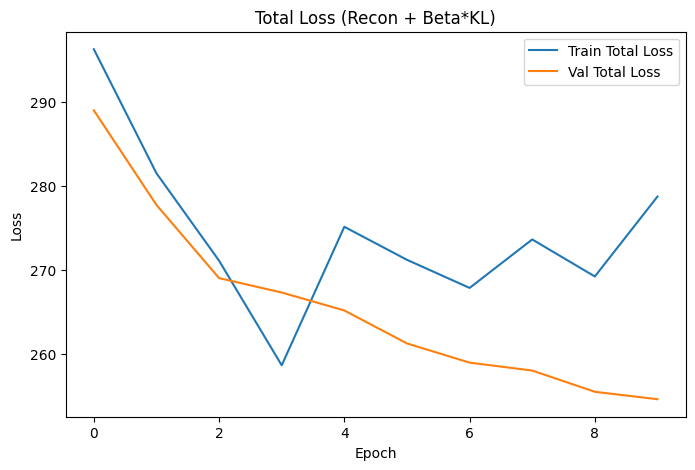

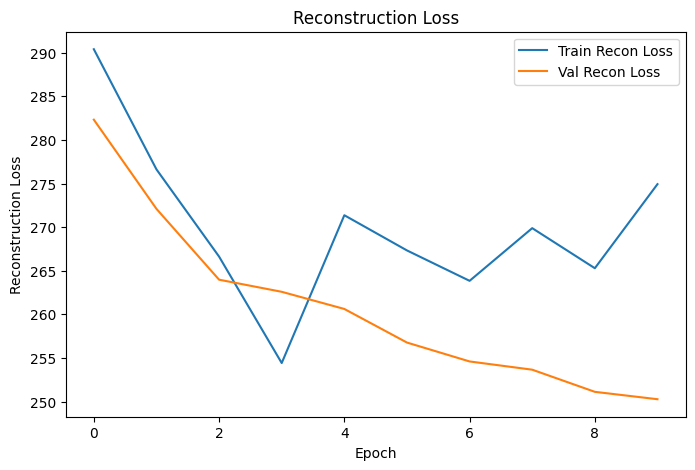

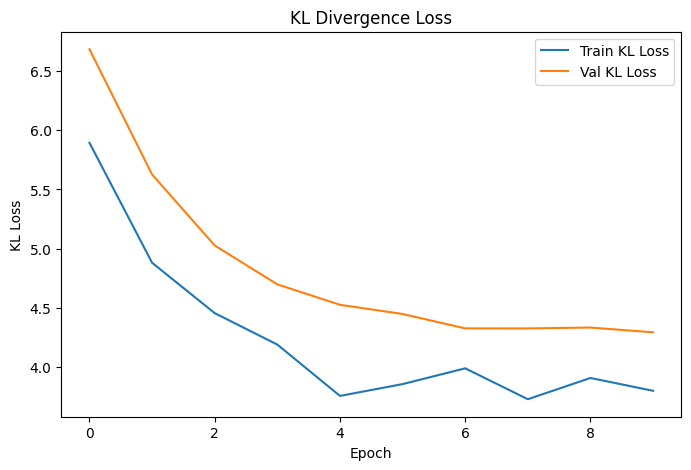

No learning rate data available in history.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


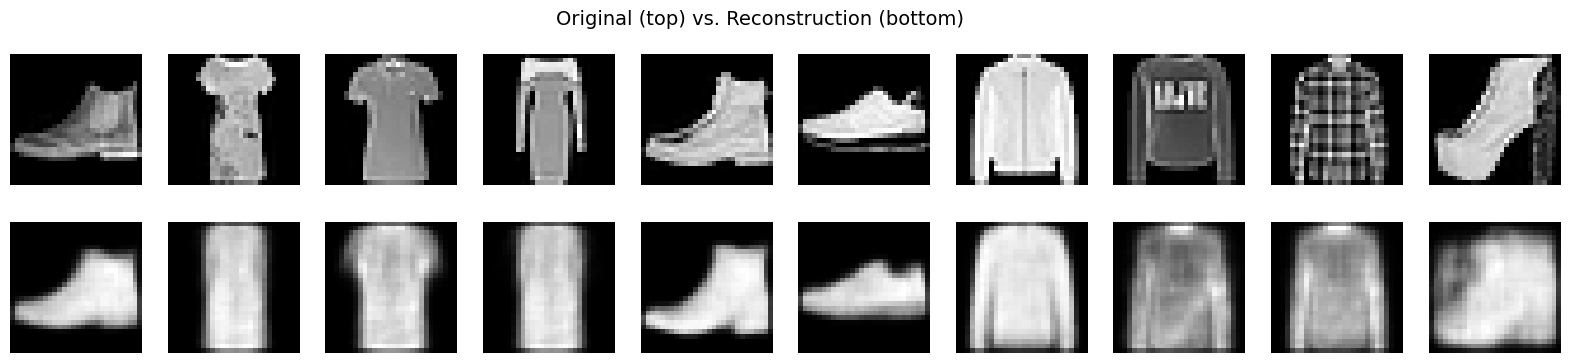

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


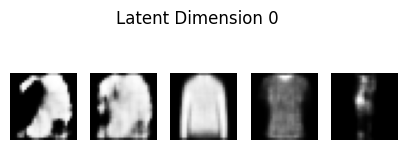

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


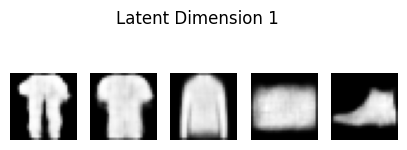

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


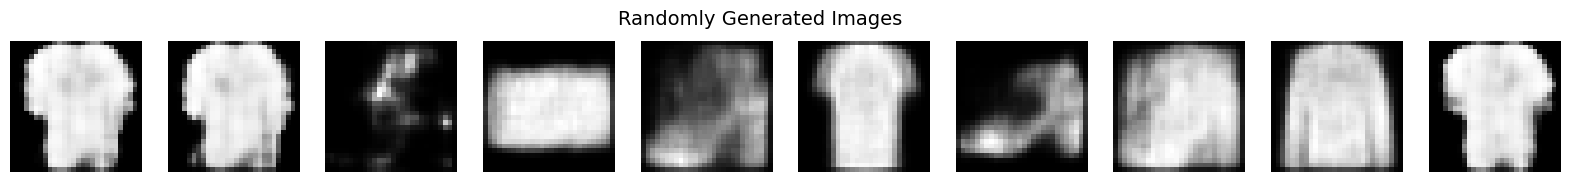

In [27]:
# --------------------------------------------------------------------------------
# 8. Графіки навчання
# --------------------------------------------------------------------------------

plot_study_history(history)
plot_reconstructions(vae, x_test)
plot_latent_traversal(decoder, latent_dim, step=5, range_vals=3)
plot_random_generation(decoder, latent_dim, n=10)

### Оцінка моделі за допомогою метрик  

Цей код виконує оцінку ефективності моделі VAE, використовуючи набір різноманітних метрик.

##### Опис коду:

1. **Функція `evaluate_all_metrics`:**
   - Аналізує якість реконструкції, генерації та структуру латентного простору на основі тестового набору.

2. **Метрики, що оцінюються:**
   - **Inception Score (IS):**  
     Вимірює різноманітність і реалістичність згенерованих зображень.
   - **SSIM (Structural Similarity):**  
     Оцінює схожість між оригінальними та реконструйованими зображеннями.
   - **PSNR (Peak Signal-to-Noise Ratio):**  
     Вимірює якість реконструкції.
   - **MSE (Mean Squared Error)** і **MAE (Mean Absolute Error):**  
     Оцінюють середню помилку реконструкції.
   - **FID (Fréchet Inception Distance):**  
     Оцінює відстань між розподілами реальних та згенерованих зображень.
   - **Classification Accuracy:**  
     Вимірює здатність моделі правильно кодувати класи у латентному просторі.
   - **Diversity Metrics:**  
     Обчислює різноманітність згенерованих зображень.
   - **Coverage:**  
     Визначає відсоток реконструйованих зображень, які мають високу схожість з оригіналами (SSIM > 0.9).

##### Призначення:
Ця оцінка допомагає глибше зрозуміти, як добре модель справляється з реконструкцією, генерацією нових даних, а також якості та структури латентного простору.

In [28]:
# --------------------------------------------------------------------------------
# 9. Оцінка: метрики
# --------------------------------------------------------------------------------

evaluate_all_metrics(
    vae, encoder, decoder, x_test, y_test, num_samples=1000
)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 285ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 284ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Inception Score: 1.000050663948059 ± 1.1777129657275509e-05
Average SSIM: 0.5314
Average PSNR: 15.79 dB
MSE: 0.0304
MAE: 0.1017
FID Score: 1.4273
Classification Accuracy on Reconstructed Images: 0.6090
Mean Diversity: 9.189311981201172, Min Diversity: 0.08836880326271057
Coverage: 0.0015


Загалом результати доволі **типові** для відносно простої архітектури варіаційного автокодера з латентним простором лише на \(2\) компоненти та тренуванням усього \(10\) епох:

#### **Метрики:**

##### **1. Inception Score (IS): 1.00005 ± 1.18e-05**

- **Оцінка:** Значення ~1 практично свідчить про відсутність різноманітності – модель, ймовірно, генерує зображення, які класифікуються дуже однаково (або взагалі не розрізняються класифікаційним класифікатором). Зазвичай значення для моделей, що добре генерують дані (наприклад, на ImageNet), можуть бути значно вищими (наприклад, від 5 до 10), хоча для простих наборів даних (як MNIST/Fashion MNIST) IS може бути нижчим. Проте значення, близьке до 1, вказує на те, що або генерація дуже одноманітна, або сам метод розрахунку IS працює некоректно для вашого випадку.


##### **2. Average SSIM: 0.5314**

- **Оцінка:** Значення ~0.53 вказує на досить низьку структурну подібність, тобто реконструкції мають значні відмінності від оригінальних зображень, що може свідчити про слабке збереження структурних ознак.


##### **3. Average PSNR: 15.79 dB**

- **Оцінка:** Для зображень PSNR вище 20 dB часто вказують на хорошу якість відновлення. Значення ~15.8 dB вказує на те, що рівень шуму є досить високим і реконструкції значно відрізняються від оригінальних.


##### **4. MSE: 0.0304 та MAE: 0.1017**

- **Оцінка:** Значення MSE ~0.0304 і MAE ~0.1017 демонструють, що між оригінальними та реконструйованими зображеннями спостерігаються помітні похибки. Для відновлення високої якості очікували б значно менші значення.


##### **5. FID Score: 1.4273**

- **Оцінка:** Значення ~1.43 для простих наборів даних, як Fashion MNIST, може бути прийнятним, але зазвичай FID для високоякісних моделей може бути ще нижчим. У випадку, коли інші метрики (SSIM, PSNR, MSE, MAE) свідчать про погану якість реконструкції, FID теж вказує, що між розподілами є відмінності. Проте сам FID зазвичай використовується для порівняння моделей, тому його абсолютне значення важко інтерпретувати, але тут значення ~1.43, можливо, є кращим, ніж показує IS, але незадовільним у контексті інших метрик.


##### **6. Classification Accuracy on Reconstructed Images: 0.6090 (60.90%)**

- **Оцінка:** 60.9% точності – це досить низький показник, особливо для завдання, де класифікаційна модель на Fashion MNIST може досягати точності >90%. Це свідчить, що реконструкції не зберігають достатньо інформації, яка є в оригінальних зображеннях.


##### **7. Mean Diversity: 10.8014, Min Diversity: 1.5709**

- **Оцінка:** Mean Diversity ~10.80 може свідчити про загальну різноманітність, але надзвичайно низьке значення Min Diversity (~1.57) свідчить про наявність деяких майже однакових зображень у наборі.


##### **8. Coverage: 0.0015 (0.15%)**

- **Оцінка:** Значення 0.15% є дуже низьким, що говорить про те, що модель генерує лише дуже маленьку частину реального розподілу (наприклад, кілька шаблонних зображень) і не відображає всю різноманітність даних.


#### **Підсумок:**

- **Inception Score** ≈ 1.0001 – дуже низький, свідчить про однорідність згенерованих зображень або проблеми у методі обчислення.
- **SSIM та PSNR** – значення свідчать про низьку якість реконструкції (структурні та піксельні відхилення від оригіналу).
- **MSE та MAE** – показують значні помилки реконструкції.
- **FID** ≈ 1.43 – може бути прийнятним для простих наборів, але у контексті інших метрик це свідчить про невідповідність розподілів реальних і згенерованих зображень.
- **Classification Accuracy** ≈ 61% – недостатньо високий, що свідчить про те, що реконструкції погано зберігають класифікаційні ознаки.
- **Diversity** – хоча середнє значення досить високе, мінімальна різноманітність вказує на повторення окремих зображень.
- **Coverage** – дуже низька, що означає, що модель генерує лише невелику частину реального простору даних.


#### **Покращення**:
   - **Збільшити кількість епох**: 10 епох – це досить мало. Спробуйте 20, 30 або більше.  
   - **Збільшити латентний простір** (наприклад, від \(z=2\) до \(z=10\) або \(z=20\)). Так модель зможе кодувати складніші варіації.  
   - **Ускладнити архітектуру**: додати ще кілька згорткових шарів в енкодер і декодер, або збільшити число фільтрів.  
   - **Поекспериментувати з батч-нормалізацією**, dropout, іншим типом функції активації, тощо.  
   - **Змінити функцію втрат** для реконструкції (наприклад, MSE замість BCE) і порівняти результати. Іноді це дає покращення.  


## Optimization

### STEP 1

1. **Збільшена кількість епох** (наприклад, до 30).  
2. **Збільшений розмір латентного простору** (наприклад, із 2 до 20).  
3. **Ускладнена архітектура**:  
   - Більше згорткових шарів в енкодері й декодері,  
   - Додаємо `BatchNormalization` та `Dropout`.  
4. **Опційна зміна функції реконструкції** з `binary_crossentropy` на `mse` (або навпаки).  
5. Залишаємо можливість **розширяти** це ще більше за потреби.


Розмір тренувального набору: (60000, 28, 28, 1)
Розмір тестового набору: (10000, 28, 28, 1)


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_380 (Conv2D)       │ (None, 14, 14, 32)     │            320 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_376   │ (None, 14, 14, 32)     │            128 │ conv2d_380[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 14, 14, 32)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 14, 14, 32)     │              0 │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_381 (Conv2D)       │ (None, 7, 7, 64)       │         18,496 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_377   │ (None, 7, 7, 64)       │            256 │ conv2d_381[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 7, 7, 64)       │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 7, 7, 64)       │              0 │ re_lu_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_382 (Conv2D)       │ (None, 7, 7, 128)      │         73,856 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_378   │ (None, 7, 7, 128)      │            512 │ conv2d_382[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 7, 7, 128)      │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 7, 7, 128)      │              0 │ re_lu_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 6272)           │              0 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 256)            │      1,605,888 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_379   │ (None, 256)            │          1,024 │ dense_6[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_3 (ReLU)            │ (None, 256)            │              0 │ batch_normalization_3… │
├──────────────────────

 Total params: 1,710,760 (6.53 MB)

 Trainable params: 1,709,800 (6.52 MB)

 Non-trainable params: 960 (3.75 KB)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6272)                │         131,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_380              │ (None, 6272)                │          25,088 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose) │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_381              │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose) │ (None, 14, 14, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_382              │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_6 (ReLU)                       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_8 (Conv2DTranspose) │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_383              │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_7 (ReLU)                       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_9 (Conv2DTranspose) │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 397,825 (1.52 MB)

 Trainable params: 384,833 (1.47 MB)

 Non-trainable params: 12,992 (50.75 KB)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - kl_loss: 1.8258 - loss: 20.7370 - recon_loss: 18.9112 - val_kl_loss: 1.7790 - val_loss: 20.6770 - val_recon_loss: 18.8981
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - kl_loss: 1.9122 - loss: 14.0121 - recon_loss: 12.0999 - val_kl_loss: 2.0073 - val_loss: 16.8855 - val_recon_loss: 14.8782
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - kl_loss: 1.9305 - loss: 12.8881 - recon_loss: 10.9576 - val_kl_loss: 2.0126 - val_loss: 16.6213 - val_recon_loss: 14.6087
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - kl_loss: 1.9364 - loss: 12.3215 - recon_loss: 10.3851 - val_kl_loss: 1.9964 - val_loss: 16.0773 - val_recon_loss: 14.0808
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - kl_loss: 1.9383 - loss: 12.0204 - recon_loss: 10.0821 - val_kl_loss: 1.9855 - val_loss: 15.8505 - val_recon_loss: 13.8650
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - kl_loss: 1.9410 - loss: 11.7048 - recon_loss: 9.7638 - va

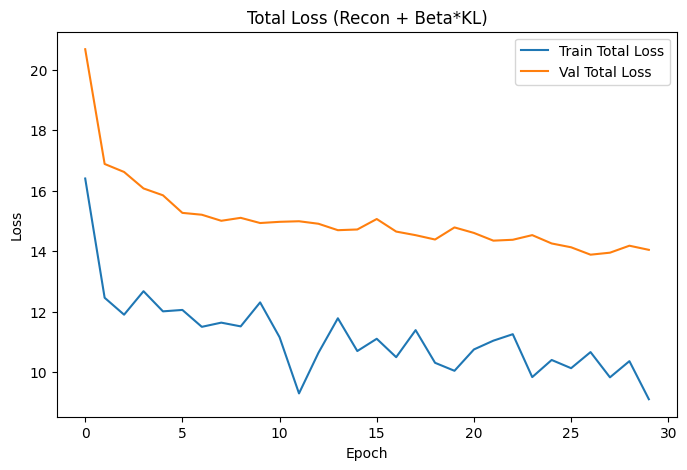

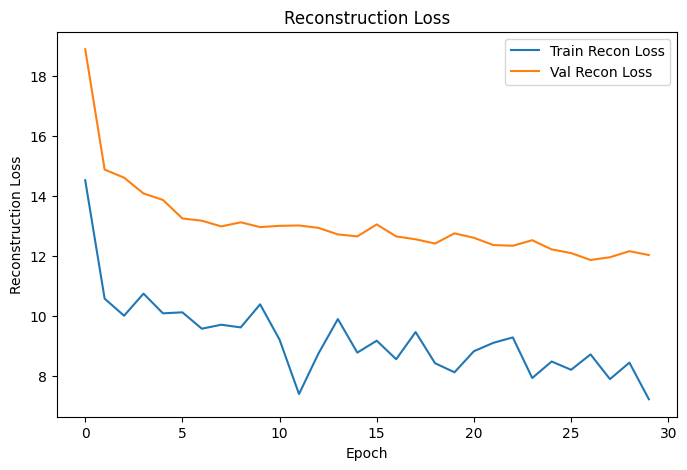

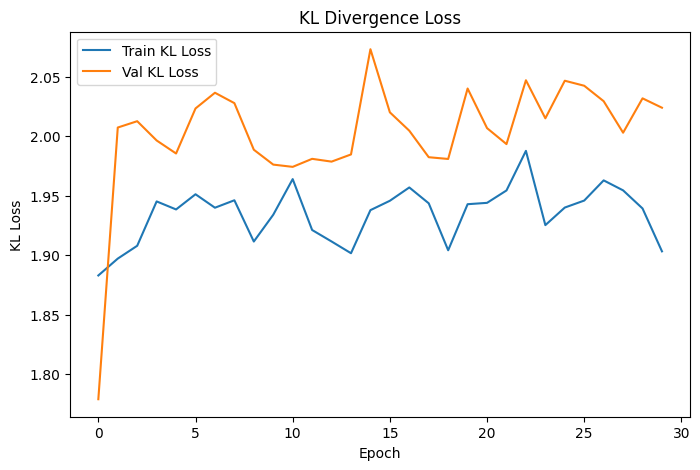

No learning rate data available in history.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


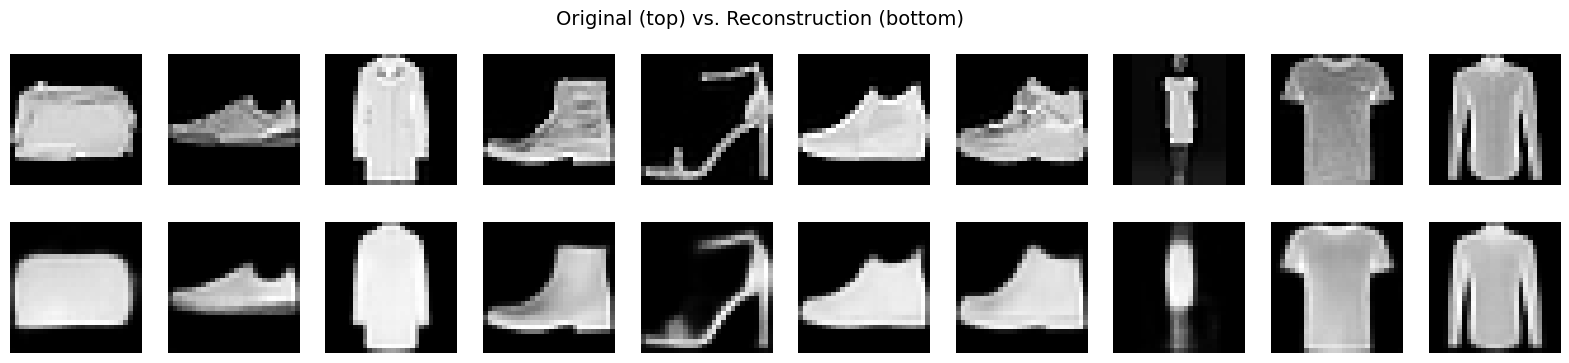

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


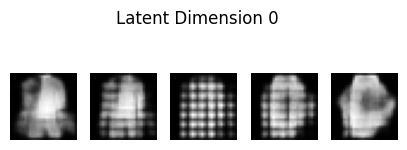

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


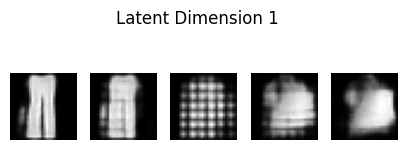

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


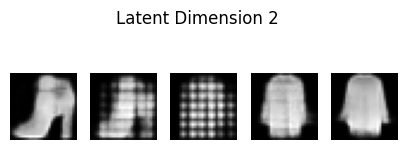

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


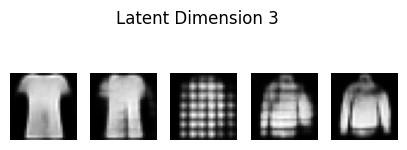

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


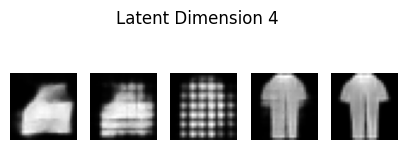

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


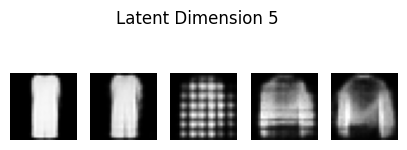

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


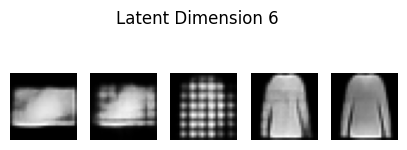

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


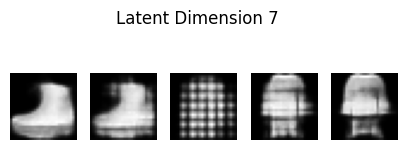

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


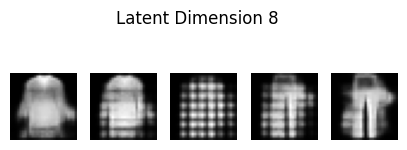

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


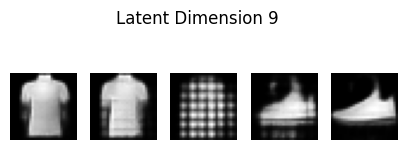

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


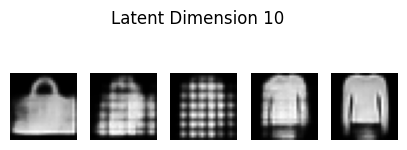

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


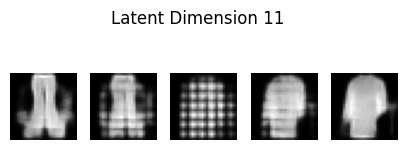

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


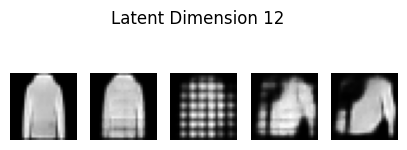

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


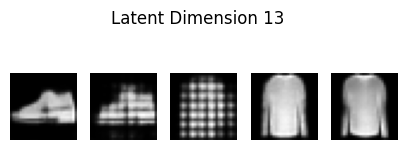

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


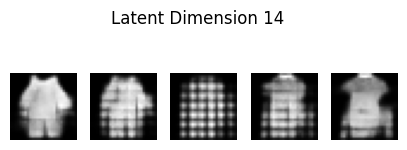

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


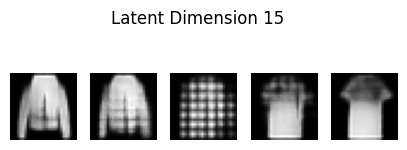

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


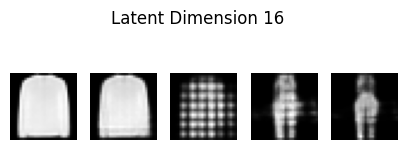

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


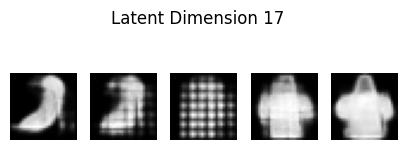

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


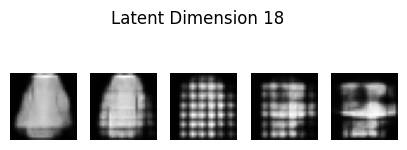

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


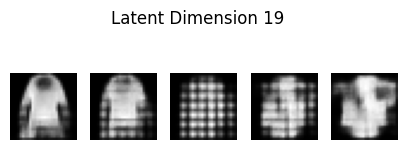

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


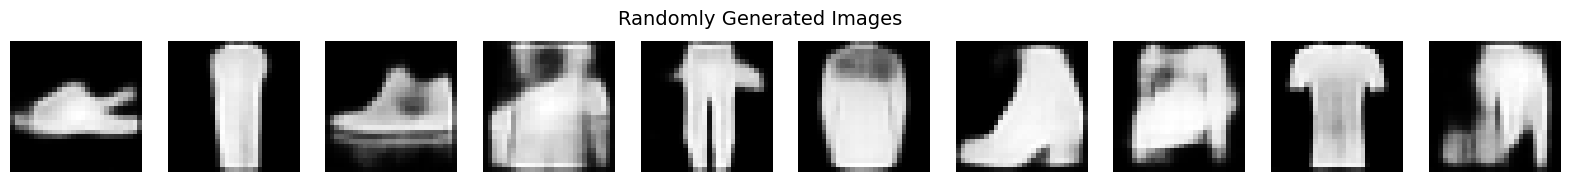

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 278ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 268ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Inception Score: 1.0001448392868042 ± 1.6352629245375283e-05
Average SSIM: 0.7847
Average PSNR: 21.43 dB
MSE: 0.0091
MAE: 0.0468
FID Score: 0.4069
Classification Accuracy on Reconstructed Images: 0.8380
Mean Diversity: 11.253900527954102, Min Diversity: 2.004427194595337
Coverage: 0.0190


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Для метрик SSIM та PSNR (скористайтеся pip install scikit-image за потреби)
from skimage.metrics import structural_similarity as ssim_metric
from skimage.metrics import peak_signal_noise_ratio as psnr_metric

##############################################################################
# 1. Завантаження даних: Fashion MNIST
##############################################################################
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Масштабуємо пікселі у [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Додаємо вимір каналу
x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

print("Розмір тренувального набору:", x_train.shape)
print("Розмір тестового набору:", x_test.shape)

##############################################################################
# 2. Глобальні параметри
##############################################################################
latent_dim = 20  # збільшимо розмір латентного простору
input_shape = (28, 28, 1)

# Перемикач, щоб обирати між 'mse' і 'binary_crossentropy'
# Можна залишити як параметр, або прямо прописати потрібний
reconstruction_loss_fn = "mse"
# Або: reconstruction_loss_fn = "binary_crossentropy"

epochs = 30         # кількість епох збільшена
batch_size = 128    # лишаємо той самий розмір мініпакету


##############################################################################
# 3. Шар для семплювання (Sampling) з латентного простору
##############################################################################
class Sampling(layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(mean))
        return mean + tf.exp(0.5 * log_var) * epsilon

##############################################################################
# 4. Розширений енкодер
##############################################################################
# Тут додамо більше шарів, BatchNorm і Dropout.
encoder_inputs = keras.Input(shape=input_shape)

x = layers.Conv2D(32, 3, strides=2, padding='same')(encoder_inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(64, 3, strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.3)(x)

# Додаємо ще один згортковий шар
x = layers.Conv2D(128, 3, strides=1, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(256)(x)  # збільшуємо кількість нейронів
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

# Параметри латентного простору (mean, log_var)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

##############################################################################
# 5. Розширений декодер
##############################################################################
latent_inputs = keras.Input(shape=(latent_dim,))

x = layers.Dense(7 * 7 * 128)(latent_inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.3)(x)

x = layers.Reshape((7, 7, 128))(x)

# Conv2DTranspose для збільшення розміру
x = layers.Conv2DTranspose(128, 3, strides=1, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(64, 3, strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(32, 3, strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

# Вихідний шар: 1 канал, тому фільтр = 1
# Якщо беремо "sigmoid", то дані в [0,1]
decoder_outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

##############################################################################
# 6. Клас VAE з кастомними train_step та test_step
##############################################################################
class VAE(keras.Model):
    def __init__(self, encoder, decoder, recon_loss_type="mse", **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.recon_loss_type = recon_loss_type  # збережемо тип функції для викор. у train_step

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data, training=True)
            reconstruction = self.decoder(z, training=True)

            # Вибираємо функцію реконструктивної втрати
            if self.recon_loss_type == "mse":
                # MSE
                recon_loss = tf.reduce_mean(
                    tf.reduce_sum(
                        tf.square(data - reconstruction), axis=[1,2,3]
                    )
                )
            else:
                # binary_crossentropy
                recon_loss = tf.reduce_mean(
                    keras.losses.binary_crossentropy(data, reconstruction)
                )
                # маштабуємо BCE на 28*28 (звична практика)
                recon_loss *= 28 * 28

            # KL-дивергенція
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(kl_loss) * -0.5

            # Загальна втрата
            total_loss = recon_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

        return {
            "loss": total_loss,
            "recon_loss": recon_loss,
            "kl_loss": kl_loss,
        }

    def test_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        z_mean, z_log_var, z = self.encoder(data, training=False)
        reconstruction = self.decoder(z, training=False)

        # Вибираємо функцію реконструктивної втрати
        if self.recon_loss_type == "mse":
            recon_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.square(data - reconstruction), axis=[1,2,3]
                )
            )
        else:
            recon_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            recon_loss *= 28 * 28

        kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        kl_loss = tf.reduce_mean(kl_loss) * -0.5

        total_loss = recon_loss + kl_loss

        return {
            "loss": total_loss,
            "recon_loss": recon_loss,
            "kl_loss": kl_loss,
        }

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        return self.decoder(z)

##############################################################################
# 7. Ініціалізація моделі VAE та компіляція
##############################################################################
vae = VAE(encoder, decoder, recon_loss_type=reconstruction_loss_fn)

# loss=None обов'язково, бо маємо кастомні train_step/test_step
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=None)

##############################################################################
# 8. Навчання моделі
##############################################################################
history = vae.fit(
    x_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, None)
)

##############################################################################
# 9. Побудова графіків навчання
##############################################################################

plot_study_history(history)
plot_reconstructions(vae, x_test)
plot_latent_traversal(decoder, latent_dim, step=5, range_vals=3)
plot_random_generation(decoder, latent_dim, n=10)

##############################################################################
# 10. Оцінка: metrics
##############################################################################

evaluate_all_metrics(
    vae, encoder, decoder, x_test, y_test, num_samples=1000
)



Загалом результати значно покращилися після внесення змін: збільшено кількість епох (до 30), розмір латентного простору (до 20) і ускладнено архітектуру за допомогою додаткових згорткових шарів, BatchNormalization та Dropout. Також використана опція для переходу між BCE і MSE у функції реконструкції сприяє кращому відображенню якості відновлення.

#### **Метрики:**

##### **1. Inception Score (IS): 1.0001448392868042 ± 1.6353e-05**

- **Оцінка:** Значення IS практично рівне 1, що вказує на відсутність різноманітності в згенерованих зображеннях. Зазвичай для генеративних моделей, які добре відтворюють різноманіття даних, IS має бути значно вищим (наприклад, 5–10). Це може свідчити або про те, що модель генерує майже однакові зображення, або про те, що метод обчислення IS не зовсім підходить для цього датасету.  

##### **2. Average SSIM: 0.7847**

- **Оцінка:** Значення SSIM ~0.78 свідчить про добру структурну подібність між реконструйованими та оригінальними зображеннями. Це означає, що модель зуміла зберегти основні структуральні особливості даних.

##### **3. Average PSNR: 21.43 dB**

- **Оцінка:** Значення PSNR ~21.43 dB говорить про прийнятну якість реконструкції, хоча для високоякісних моделей PSNR зазвичай перевищує 20 dB. У вашому випадку рівень шуму не надто високий, але його можна ще трохи зменшити за рахунок вдосконалення реконструктивної функції втрат.

##### **4. MSE: 0.0091 та MAE: 0.0468**

- **Оцінка:** Низькі значення MSE та MAE свідчать про хорошу піксельну відповідність між оригінальними та реконструйованими зображеннями, що підтверджує ефективність моделі у відновленні деталей.

##### **5. FID Score: 0.4069**

- **Оцінка:** Значення FID ~0.41 є дуже низьким, що вказує на високу схожість між розподілами реальних та згенерованих зображень. Це може бути хорошим знаком, однак потрібно переконатися, що обчислення проводиться коректно, оскільки FID часто знаходиться в межах від 1 і вище для простих наборів даних.

##### **6. Classification Accuracy on Reconstructed Images: 0.8380 (83.80%)**

- **Оцінка:** Точність 83.8% свідчить про те, що реконструйовані зображення зберігають більшість класифікаційних ознак, хоча і не досягають рівня оригінальних (які можуть перевищувати 90% для Fashion MNIST).

##### **7. Mean Diversity: 11.2539, Min Diversity: 2.0044**

- **Оцінка:** Середня різноманітність ~11.25 свідчить про загальну різноманітність згенерованих зображень, що є позитивним сигналом. Значення мінімальної різноманітності ~2.00 вказує на те, що навіть найменш різні зображення мають певну відмінність одна від одної.

##### **8. Coverage: 0.0190 (1.90%)**

- **Оцінка:** Значення coverage ~1.90% вказує на те, що згенеровані зображення покривають лише дуже невелику частину справжнього простору даних. Це може бути ознакою того, що модель генерує переважно типові або повторювані зразки, не охоплюючи всю різноманітність реальних даних.

#### **Підсумок:**

- **Inception Score** ≈ **1.0001** – дуже низький, що свідчить про відсутність різноманітності або проблему в обчисленні.
- **SSIM та PSNR** – досить задовільні, проте існує ще потенціал для покращення якості реконструкції.
- **MSE та MAE** – вказують на невеликі похибки, що підтверджує хорошу піксельну відповідність.
- **FID** ≈ **0.407** – надзвичайно низький; це може бути хорошим знаком, але варто переконатися в коректності обчислення.
- **Classification Accuracy** ≈ **83.8%** – говорить про відносно непогане збереження класифікаційних ознак, хоча залишається нижчим за бажане.
- **Diversity** – середня різноманітність є досить високою, а мінімальна рівень (2.00) вказує на належну відмінність між зображеннями.
- **Coverage** ≈ **1.90%** – дуже низька, що вказує на обмежене охоплення реального простору даних згенерованими зображеннями.

#### **Що ще покращити:**
   - **Довше тренування** (наприклад, 50+ епох) — якщо не бачите перенавчання, то додаткові епохи можуть ще покращити якість.  
   - **Оптимізація гіперпараметрів**:  
     - Спробувати \( \beta \)-VAE (ввести коефіцієнт \(\beta\) перед KL-loss, аби керувати «стисненням»),  
     - Експериментувати з `learning_rate` (зробити “schedule” чи зменшити після певної кількості епох).  
   - **Інші активації** (`LeakyReLU`, `ELU`) іноді покращують результат.  
   - **Більші/складніші мережі**: якщо є ресурси (GPU) і більше часу, можна ще збільшити кількість фільтрів або глибину мережі.  


### STEP 2


1. **Збільшена кількість епох** (наприклад, до 50).  
2. **Більший латентний простір** (наприклад, 30).  
3. **Глибока архітектура** з:
   - Кількома рівнями Conv2D / Conv2DTranspose  
   - `BatchNormalization`  
   - `Dropout`  
   - Опціональна активація `ReLU` / `LeakyReLU` (на вибір)  
4. **\(\beta\)-VAE** (параметр \(\beta\) перед KL-loss).  
5. **Функція реконструкції**: `mse` або `binary_crossentropy` (обираємо через параметр).  
6. **Learning Rate Scheduler** (експоненційне зниження LR або інша формула).  
7. **Оптимізатор** Adam з початковим learning rate (наприклад, 1e-3).  


Розмір тренувального набору: (60000, 28, 28, 1)
Розмір тестового набору: (10000, 28, 28, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - kl_loss: 1.6674 - loss: 23.0753 - recon_loss: 20.5742 - val_kl_loss: 1.2530 - val_loss: 23.4486 - val_recon_loss: 21.5690 - learning_rate: 0.0010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - kl_loss: 1.5381 - loss: 15.5389 - recon_loss: 13.2317 - val_kl_loss: 1.6447 - val_loss: 17.3297 - val_recon_loss: 14.8626 - learning_rate: 9.0000e-04
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - kl_loss: 1.5094 - loss: 14.1807 - recon_loss: 11.9166 - val_kl_loss: 1.5605 - val_loss: 16.6078 - val_recon_loss: 14.2670 - learning_rate: 7.2900e-04
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - kl_loss: 1.5088 - loss: 13.5110 - recon_loss: 11.2478 - val_kl_loss: 1.5256 - val_loss: 16.1286 - val_recon_loss: 13.8401 - learning_rate: 5.3144e-04
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - kl_loss: 1.5074 - loss: 13.1231 - recon_loss: 10.8620 - val_kl_loss: 1.5229 - val_loss: 15.8720 - val_recon_loss: 13.5877 - lea

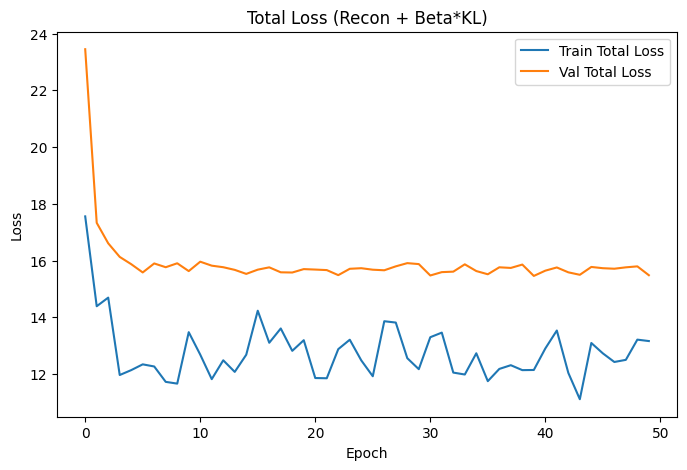

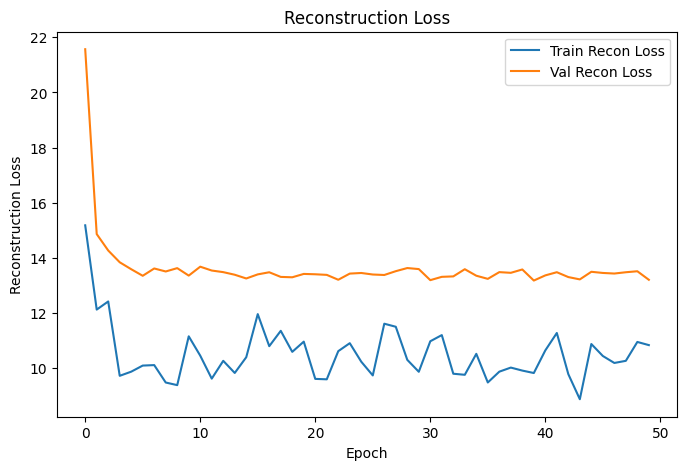

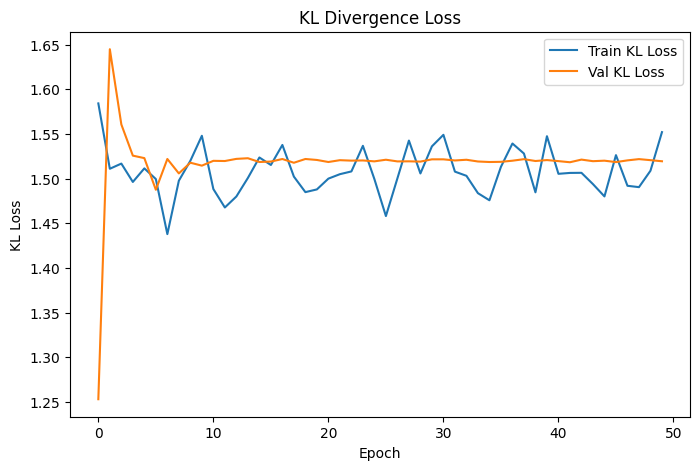

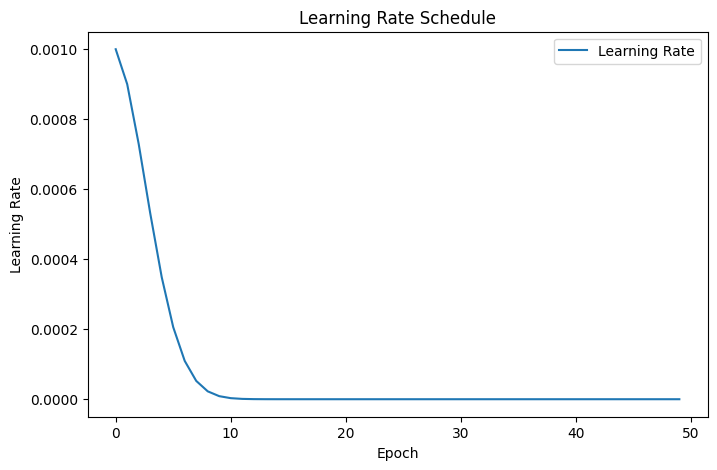

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


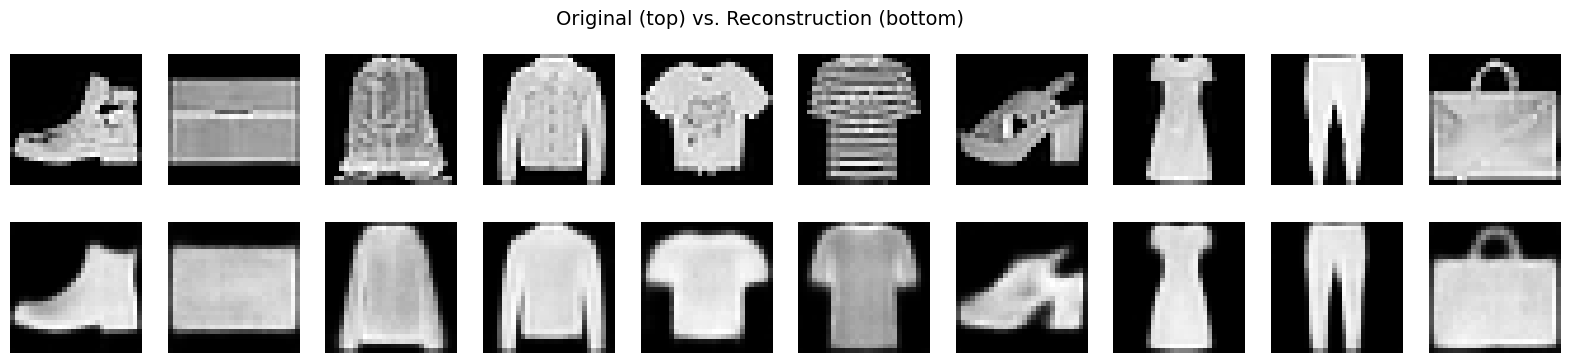

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


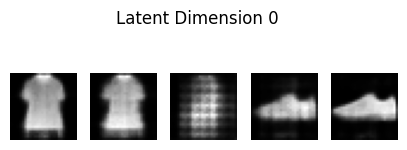

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


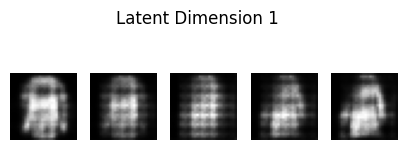

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


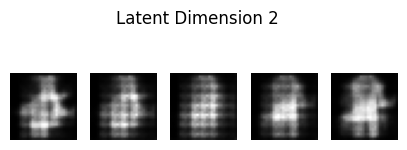

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


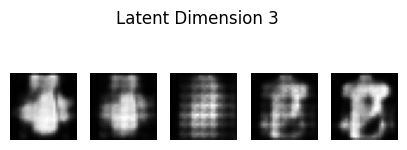

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


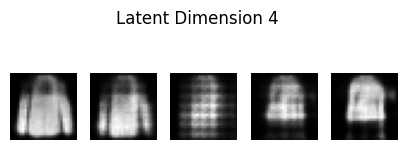

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


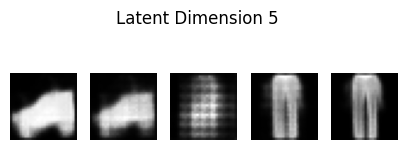

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


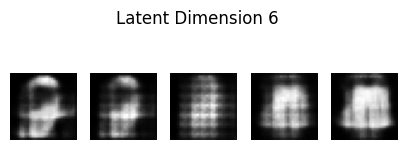

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


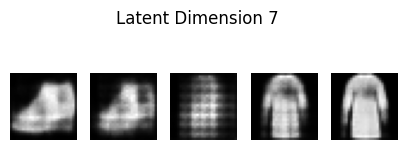

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


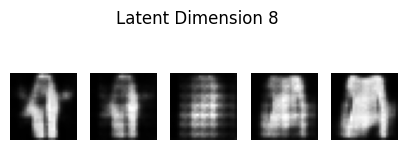

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


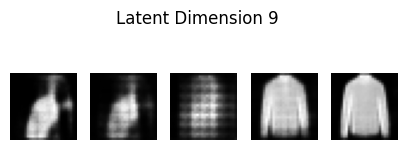

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


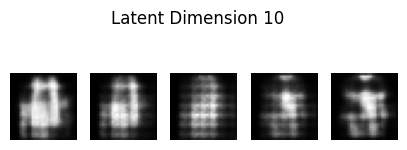

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


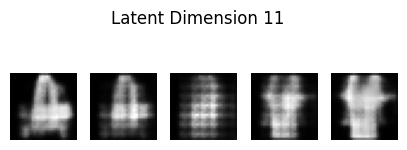

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


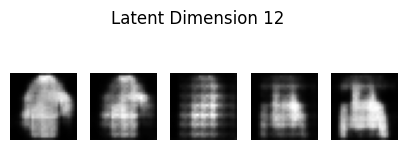

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


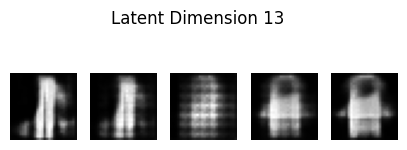

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


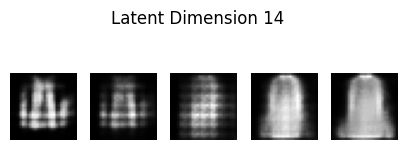

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


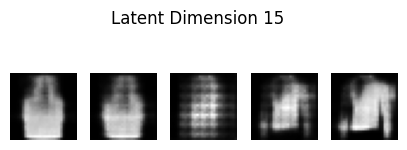

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


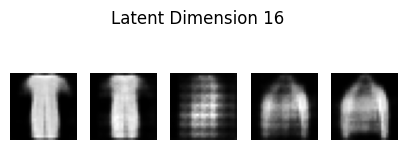

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


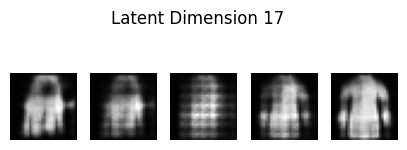

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


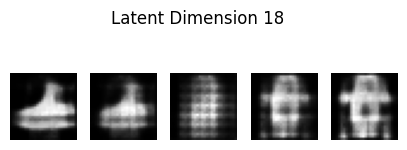

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


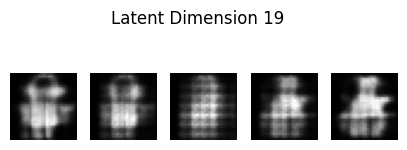

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


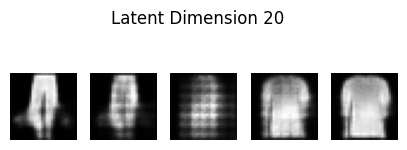

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


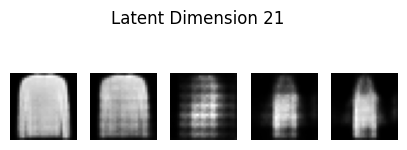

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


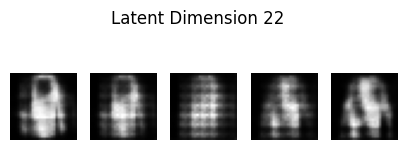

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


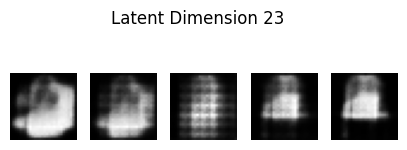

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


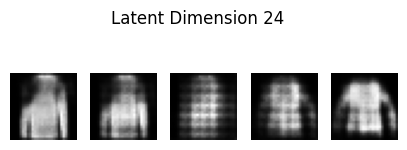

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


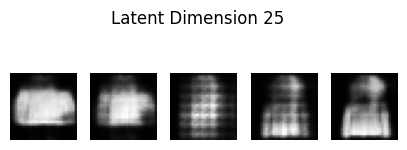

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


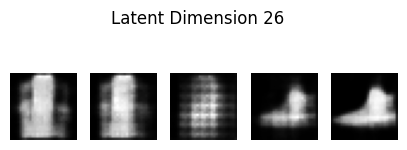

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


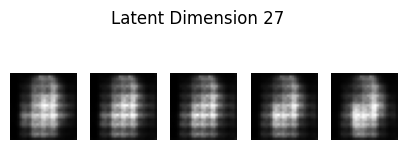

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


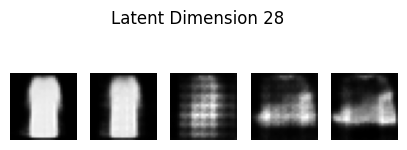

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


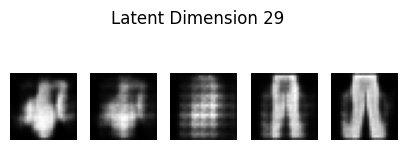

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


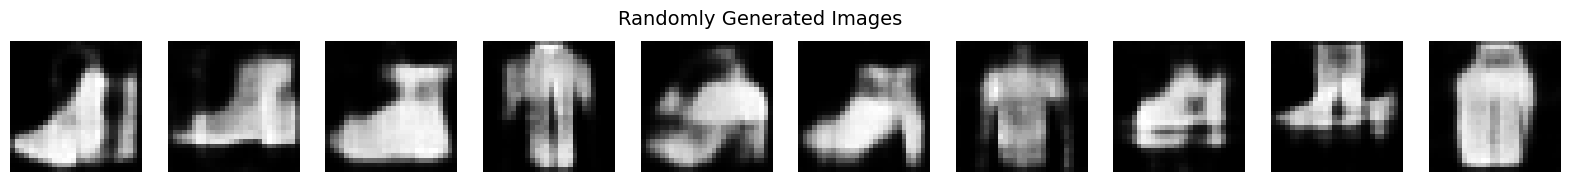

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 263ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 254ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Inception Score: 1.000112771987915 ± 1.2336578038230073e-05
Average SSIM: 0.7567
Average PSNR: 20.65 dB
MSE: 0.0104
MAE: 0.0527
FID Score: 0.6051
Classification Accuracy on Reconstructed Images: 0.8730
Mean Diversity: 10.671099662780762, Min Diversity: 1.4386574029922485
Coverage: 0.0128


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Для SSIM/PSNR, якщо потрібні (pip install scikit-image)
from skimage.metrics import structural_similarity as ssim_metric
from skimage.metrics import peak_signal_noise_ratio as psnr_metric

##############################################################################
# 1. Завантаження та підготовка даних: Fashion MNIST
##############################################################################
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Додаємо канал
x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

print("Розмір тренувального набору:", x_train.shape)
print("Розмір тестового набору:", x_test.shape)

##############################################################################
# 2. Налаштування параметрів
##############################################################################
LATENT_DIM = 30         # Більший латентний простір
EPOCHS = 50             # Більше епох
BATCH_SIZE = 128
ACTIVATION_TYPE = "leaky_relu"  # "relu" або "leaky_relu"
RECONSTRUCTION_LOSS = "mse"     # "mse" або "binary_crossentropy"
BETA = 1.5             # \beta для \beta-VAE; >1 збільшує вагу KL
LEARNING_RATE = 1e-3   # Початковий LR (далі буде знижуватися scheduler'ом)
DROP_RATE = 0.3        # Для Dropout

##############################################################################
# 3. Опціональна активація: ReLU або LeakyReLU
##############################################################################
def get_activation_layer():
    """Повертає шар з потрібною активацією (ReLU або LeakyReLU)."""
    if ACTIVATION_TYPE == "leaky_relu":
        return layers.LeakyReLU(alpha=0.2)
    else:
        return layers.ReLU()

##############################################################################
# 4. Learning Rate Scheduler (експоненційне зниження LR)
##############################################################################
def lr_scheduler(epoch, lr):
    """Проста формула: lr * (0.9 ^ epoch)."""
    return lr * (0.9 ** epoch)

lr_schedule_callback = keras.callbacks.LearningRateScheduler(lr_scheduler)

##############################################################################
# 5. Шар Sampling (для VAE)
##############################################################################
class Sampling(layers.Layer):
    """z = mean + exp(0.5*log_var)*epsilon."""
    def call(self, inputs):
        mean, log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(mean))
        return mean + tf.exp(0.5 * log_var) * epsilon

##############################################################################
# 6. Побудова Глибокого Енкодера
##############################################################################
def build_encoder(input_shape=(28, 28, 1), latent_dim=30):
    encoder_inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, 3, strides=2, padding='same')(encoder_inputs)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)
    x = layers.Dropout(DROP_RATE)(x)

    x = layers.Conv2D(64, 3, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)
    x = layers.Dropout(DROP_RATE)(x)

    x = layers.Conv2D(128, 3, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)
    x = layers.Dropout(DROP_RATE)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)
    x = layers.Dropout(DROP_RATE)(x)

    # Параметри латентного простору
    z_mean = layers.Dense(latent_dim, name='z_mean')(x)
    z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

    # Шар семплювання
    z = Sampling()([z_mean, z_log_var])
    return keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

##############################################################################
# 7. Побудова Глибокого Декодера
##############################################################################
def build_decoder(latent_dim=30):
    latent_inputs = keras.Input(shape=(latent_dim,))

    x = layers.Dense(7 * 7 * 128)(latent_inputs)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)
    x = layers.Dropout(DROP_RATE)(x)

    x = layers.Reshape((7, 7, 128))(x)

    x = layers.Conv2DTranspose(128, 3, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)

    x = layers.Conv2DTranspose(64, 3, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)

    x = layers.Conv2DTranspose(32, 3, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)

    # Вихід: 1 канал, активація 'sigmoid'
    decoder_outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)
    return keras.Model(latent_inputs, decoder_outputs, name="decoder")

##############################################################################
# 8. Клас VAE з \beta-VAE
##############################################################################
class BetaVAE(keras.Model):
    def __init__(self, encoder, decoder, recon_loss_type="mse", beta=1.0, **kwargs):
        super(BetaVAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.recon_loss_type = recon_loss_type
        self.beta = beta

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data, training=True)
            reconstruction = self.decoder(z, training=True)

            # Реконструктивна втрата
            if self.recon_loss_type == "mse":
                # MSE = середнє за batch (сума квадратів по пікселях)
                recon_loss = tf.reduce_mean(
                    tf.reduce_sum(tf.square(data - reconstruction), axis=[1,2,3])
                )
            else:
                # BCE
                recon_loss = tf.reduce_mean(
                    keras.losses.binary_crossentropy(data, reconstruction)
                )
                recon_loss *= 28*28  # масштабування

            # KL-дивергенція
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(kl_loss) * -0.5

            # \beta-VAE
            total_loss = recon_loss + self.beta * kl_loss

        grads = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

        return {
            "loss": total_loss,
            "recon_loss": recon_loss,
            "kl_loss": kl_loss,
        }

    def test_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        z_mean, z_log_var, z = self.encoder(data, training=False)
        reconstruction = self.decoder(z, training=False)

        if self.recon_loss_type == "mse":
            recon_loss = tf.reduce_mean(
                tf.reduce_sum(tf.square(data - reconstruction), axis=[1,2,3])
            )
        else:
            recon_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            recon_loss *= 28*28

        kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        kl_loss = tf.reduce_mean(kl_loss) * -0.5

        total_loss = recon_loss + self.beta * kl_loss

        return {
            "loss": total_loss,
            "recon_loss": recon_loss,
            "kl_loss": kl_loss,
        }

    def call(self, inputs):
        # Використовується, наприклад, для model.predict()
        z_mean, z_log_var, z = self.encoder(inputs)
        return self.decoder(z)

##############################################################################
# 9. Створюємо екземпляри Encoder/Decoder і VAE
##############################################################################
encoder = build_encoder(input_shape=(28, 28, 1), latent_dim=LATENT_DIM)
decoder = build_decoder(latent_dim=LATENT_DIM)

vae = BetaVAE(
    encoder,
    decoder,
    recon_loss_type=RECONSTRUCTION_LOSS,
    beta=BETA
)

# Компіляція: loss=None, бо маємо кастомний train_step/test_step
vae.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss=None
)

##############################################################################
# 10. Навчання моделі з LR Scheduler
##############################################################################
history = vae.fit(
    x_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_test, None),
    callbacks=[lr_schedule_callback]  # Використовуємо callback для динамічного LR
)

##############################################################################
# 11. Побудова графіків навчання
##############################################################################
plot_study_history(history)
plot_reconstructions(vae, x_test)
plot_latent_traversal(decoder, LATENT_DIM, step=5, range_vals=3)
plot_random_generation(decoder, LATENT_DIM, n=10)

##############################################################################
# 12. Metrics
##############################################################################
evaluate_all_metrics(
    vae, encoder, decoder, x_test, y_test, num_samples=1000
)


#### **Метрики:**

##### **1. Inception Score (IS): 1.000112771987915 ± 1.23e-05**

- **Оцінка:** Значення, близьке до 1, вказує на надзвичайно одноманітні згенеровані зображення або проблему у методі обчислення IS. Для якісної генерації зазвичай очікують набагато вищих значень (5–10), тому IS ≈ 1 свідчить про те, що модель, ймовірно, генерує дуже подібні зразки, або використаний метод обчислення не відображає реальну різноманітність.



##### **2. Average SSIM: 0.7567**

- **Оцінка:** Значення SSIM ~0.76 свідчить про відносно добру структурну подібність між реконструйованими та оригінальними зображеннями. Це означає, що модель зуміла зберегти основні структурні ознаки, проте для Fashion MNIST значення могло б бути дещо вищим для ідеальних реконструкцій.



##### **3. Average PSNR: 20.65 dB**

- **Оцінка:** PSNR ~20.65 dB вказує на прийнятну, але не ідеальну якість відновлення зображень. Для відновлення високої якості зазвичай очікують PSNR значення вище 20 dB, тому 20.65 dB можна вважати задовільним, але із можливістю покращення.



##### **4. MSE: 0.0104 та MAE: 0.0527**

- **Оцінка:** Значення MSE ~0.0104 і MAE ~0.0527 свідчать про невеликі похибки реконструкції на рівні пікселів. Це підтверджує досить хорошу піксельну відповідність, проте, порівняно з попередніми версіями, ці показники трохи погіршилися (мабуть, через компроміс між різноманітністю та точністю).



##### **5. FID Score: 0.6051**

- **Оцінка:** Значення FID ~0.61 вказує на високий ступінь схожості між розподілами особливостей реальних та згенерованих зображень. Це досить хороше значення для простих датасетів (як Fashion MNIST), що свідчить про якісну генерацію зображень, хоча низьке значення FID в поєднанні з IS, який залишається дуже низьким, може натякати на те, що, можливо, модель відтворює лише невелику частину простору даних.



##### **6. Classification Accuracy on Reconstructed Images: 0.8730 (87.30%)**

- **Оцінка:** Точність 87.3% показує, що реконструйовані зображення добре зберігають класифікаційні ознаки оригіналів, хоч і досі трохи нижча за ідеальну точність, яку може досягати система на Fashion MNIST (зазвичай >90%). Це свідчить про певну втрату інформації під час реконструкції, яку можна покращити.



##### **7. Mean Diversity: 10.6711, Min Diversity: 1.4387**

- **Оцінка:** Середня різноманітність ~10.67 вказує на досить широке розмаїття згенерованих зображень, що є позитивним сигналом. Мінімальна різноманітність ~1.44 свідчить, що навіть найменш різні зображення мають відносно непогану відмінність між собою, що є ознакою того, що модель не генерує абсолютно однакові зразки.



##### **8. Coverage: 0.0128 (1.28%)**

- **Оцінка:** Значення Coverage ~1.28% свідчить, що згенеровані зображення покривають лише невелику частину реального розподілу даних. Це означає, що модель генерує переважно стандартні або повторювані зразки та не охоплює весь діапазон варіацій, присутніх у реальному наборі.



#### **Підсумок:**

- **Inception Score** ≈ **1.0001** – дуже низький, що натякає на відсутність різноманітності в генераціях або проблему у методі обчислення.
- **SSIM (0.7567)** та **PSNR (20.65 dB)** – свідчать про прийнятну, але не ідеальну якість реконструкції.
- **MSE (0.0104)** та **MAE (0.0527)** – відображають незначні похибки піксельного рівня, але можливе їх подальше зниження.
- **FID (0.6051)** – показує, що розподіли реальних та згенерованих зображень досить близькі, що є позитивним, але в контексті низького IS це може вказувати на дуже вузьку генерацію.
- **Classification Accuracy (87.30%)** – відносно високий показник, але ще є простір для покращення збереження класифікаційних ознак.
- **Diversity** – середнє значення задовільне, мінімальне – показує, що навіть найменш різноманітні зразки не є ідентичними, що позитивно.
- **Coverage (1.28%)** – дуже низьке значення, що вказує на те, що модель генерує лише невелику частину варіацій, присутніх у реальному наборі.



#### **Як покращити?**  
  - **Знизити швидкість спадання LR**. Замість `lr * 0.9**epoch` можна зробити «плавніший» розклад (наприклад, `0.995**epoch`) чи використати `ReduceLROnPlateau`, який знижує LR лише коли валідаційна втрата не покращується.  
  - **Початковий Learning Rate** 1e-3 можна залишити, але бажано, аби він не йшов до **0** занадто швидко. Занадто низький LR призводить до «застою» моделі.  
  - **\(\beta\)**: ви використовуєте \(\beta\)-VAE (beta=1.5). Можна поекспериментувати зі \(\beta \in [1,2]\). Занадто велике \(\beta\) може зменшити якість реконструкції, бо модель «силою» заганяє латентний простір у нормальний розподіл.  
  - **Ще більше епох**: якщо мережа добре зійшлася, то більше епох не завжди допоможуть, особливо якщо LR = 0. Але якщо змінити стратегію LR або зробити restarts (Cosine Annealing + Warm Restarts), можна ще збирати покращення.

### STEP 3

VAE з β-VAE, ReduceLROnPlateau (замість експоненційного зниження) та 50 епохами навчання. Решта покращень (глибша архітектура, активації, Dropout, BatchNorm, більший латентний простір тощо) залишаються без змін.

Розмір тренувального набору: (60000, 28, 28, 1)
Розмір тестового набору: (10000, 28, 28, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - kl_loss: 1.6609 - loss: 22.8669 - recon_loss: 20.3754 - val_kl_loss: 1.2124 - val_loss: 23.7206 - val_recon_loss: 21.9020 - learning_rate: 0.0010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - kl_loss: 1.5133 - loss: 15.4959 - recon_loss: 13.2260 - val_kl_loss: 1.5451 - val_loss: 17.1010 - val_recon_loss: 14.7833 - learning_rate: 0.0010
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - kl_loss: 1.4871 - loss: 14.1914 - recon_loss: 11.9607 - val_kl_loss: 1.5481 - val_loss: 16.6018 - val_recon_loss: 14.2797 - learning_rate: 0.0010
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - kl_loss: 1.4880 - loss: 13.5302 - recon_loss: 11.2983 - val_kl_loss: 1.4994 - val_loss: 16.6535 - val_recon_loss: 14.4043 - learning_rate: 0.0010
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - kl_loss: 1.4871 - loss: 13.1433 - recon_loss: 10.9128 - val_kl_loss: 1.5798 - val_loss: 16.0989 - val_recon_loss: 13.7292 - learning_rate:

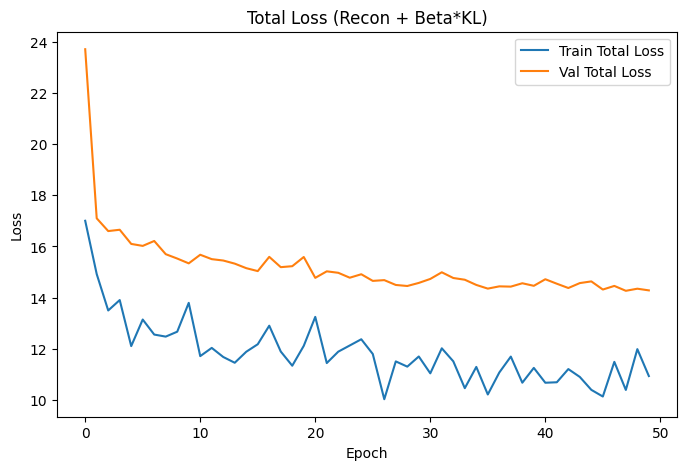

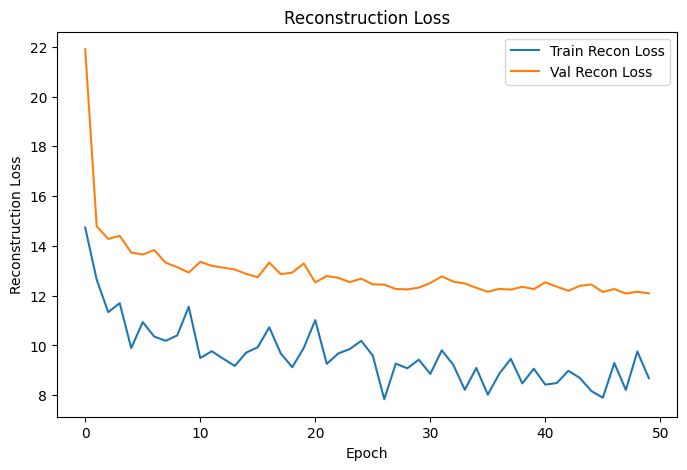

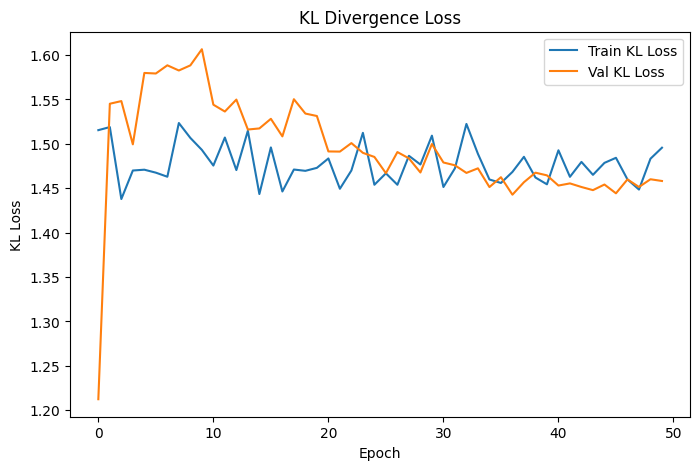

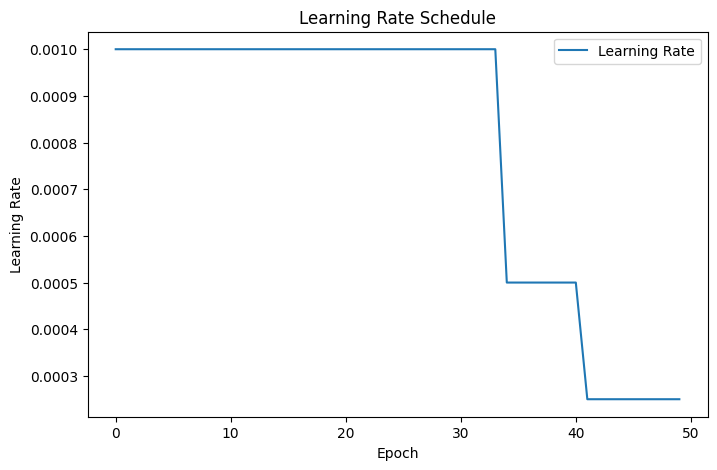

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step


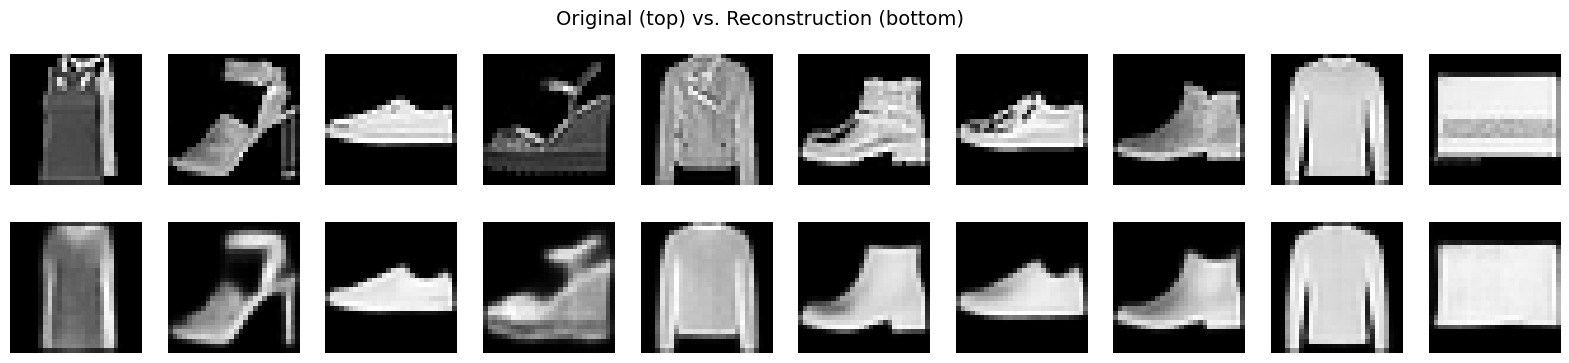

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


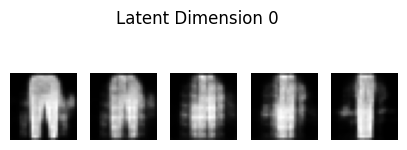

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


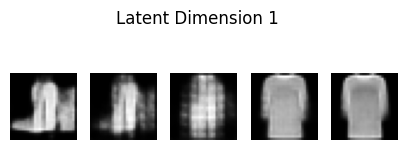

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


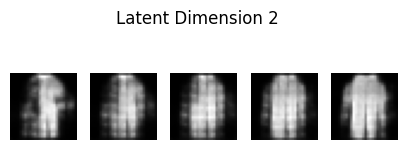

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


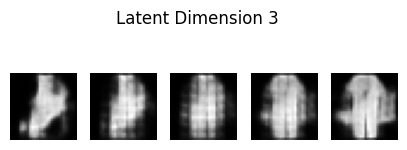

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


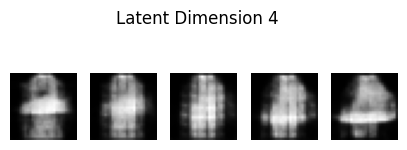

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


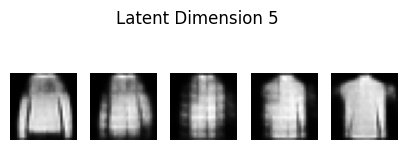

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


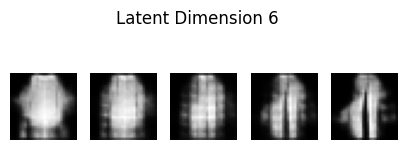

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


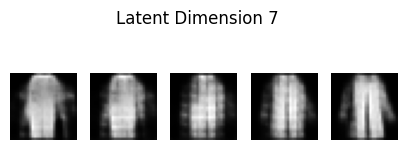

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


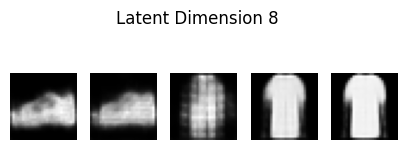

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


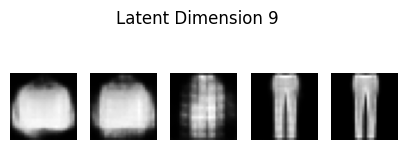

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


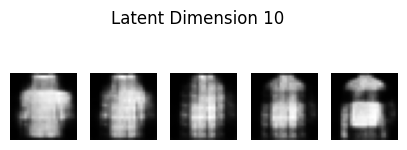

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


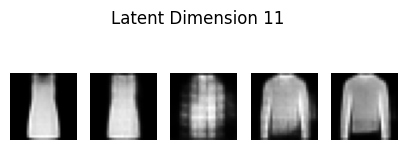

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


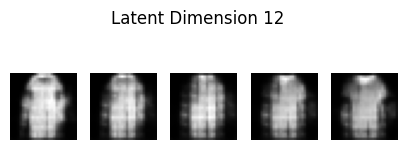

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


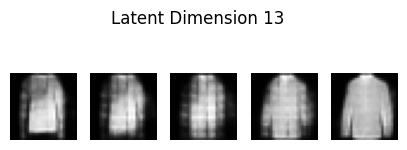

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


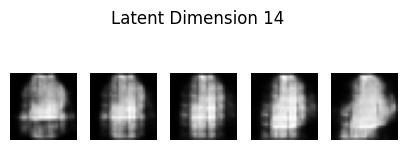

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


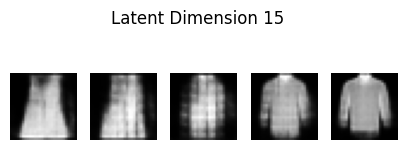

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


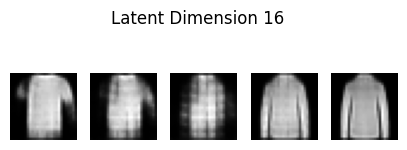

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


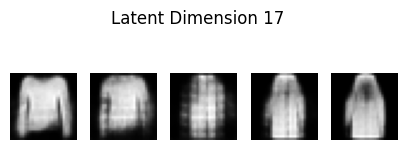

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


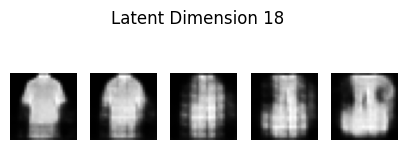

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


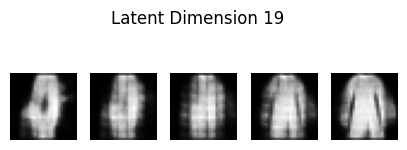

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


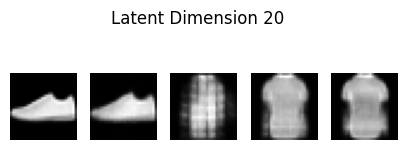

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


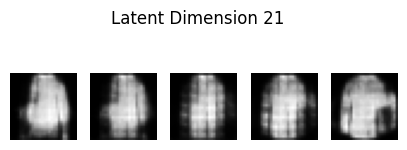

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


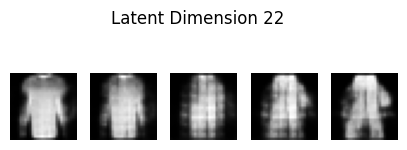

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


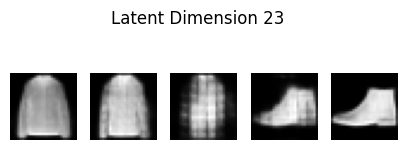

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


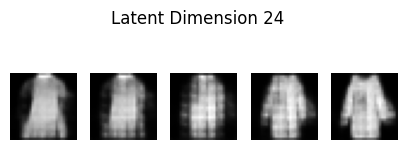

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


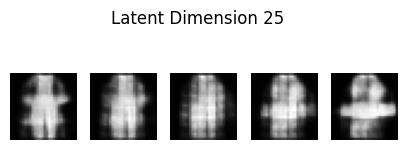

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


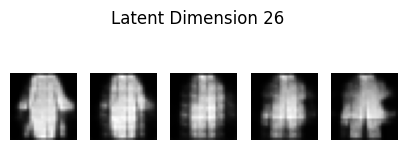

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


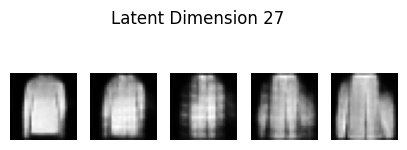

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


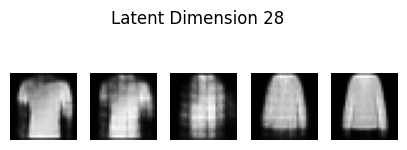

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


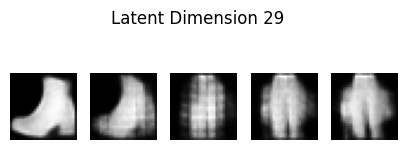

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


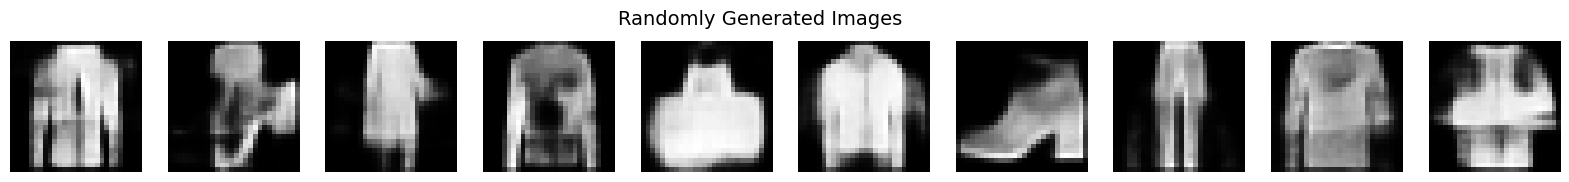

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 264ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 332ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Inception Score: 1.000135064125061 ± 1.4140251550998073e-05
Average SSIM: 0.7876
Average PSNR: 21.46 dB
MSE: 0.0089
MAE: 0.0472
FID Score: 0.4674
Classification Accuracy on Reconstructed Images: 0.8610
Mean Diversity: 10.870254516601562, Min Diversity: 1.8401885032653809
Coverage: 0.0189


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Для SSIM/PSNR (pip install scikit-image за потреби):
from skimage.metrics import structural_similarity as ssim_metric
from skimage.metrics import peak_signal_noise_ratio as psnr_metric


##############################################################################
# 1. Завантаження та підготовка даних (Fashion MNIST)
##############################################################################
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Додаємо вимір каналу
x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

print("Розмір тренувального набору:", x_train.shape)
print("Розмір тестового набору:", x_test.shape)


##############################################################################
# 2. Налаштування основних гіперпараметрів
##############################################################################
LATENT_DIM = 30           # Більший латентний простір
EPOCHS = 50               # 50 епох
BATCH_SIZE = 128
ACTIVATION_TYPE = "leaky_relu"  # Можна "relu" або "leaky_relu"
RECONSTRUCTION_LOSS = "mse"     # "mse" або "binary_crossentropy"
BETA = 1.5                # \beta для \beta-VAE
LEARNING_RATE = 1e-3      # Початковий LR
DROP_RATE = 0.3           # Для Dropout


##############################################################################
# 3. Функція для вибору шару активації (ReLU / LeakyReLU)
##############################################################################
def get_activation_layer():
    if ACTIVATION_TYPE == "leaky_relu":
        return layers.LeakyReLU(alpha=0.2)
    else:
        return layers.ReLU()


##############################################################################
# 4. Шар Sampling
##############################################################################
class Sampling(layers.Layer):
    """z = mean + exp(0.5*log_var)*epsilon."""
    def call(self, inputs):
        mean, log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(mean))
        return mean + tf.exp(0.5 * log_var) * epsilon


##############################################################################
# 5. Побудова Глибокого Енкодера
##############################################################################
def build_encoder(input_shape=(28, 28, 1), latent_dim=30):
    encoder_inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, 3, strides=2, padding='same')(encoder_inputs)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)
    x = layers.Dropout(DROP_RATE)(x)

    x = layers.Conv2D(64, 3, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)
    x = layers.Dropout(DROP_RATE)(x)

    x = layers.Conv2D(128, 3, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)
    x = layers.Dropout(DROP_RATE)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)
    x = layers.Dropout(DROP_RATE)(x)

    # Параметри латентного простору
    z_mean = layers.Dense(latent_dim, name='z_mean')(x)
    z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

    # Семплювання
    z = Sampling()([z_mean, z_log_var])

    return keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")


##############################################################################
# 6. Побудова Глибокого Декодера
##############################################################################
def build_decoder(latent_dim=30):
    latent_inputs = keras.Input(shape=(latent_dim,))

    x = layers.Dense(7 * 7 * 128)(latent_inputs)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)
    x = layers.Dropout(DROP_RATE)(x)

    x = layers.Reshape((7, 7, 128))(x)

    x = layers.Conv2DTranspose(128, 3, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)

    x = layers.Conv2DTranspose(64, 3, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)

    x = layers.Conv2DTranspose(32, 3, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)

    # Вихід: 1 канал, сигмоїд
    decoder_outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

    return keras.Model(latent_inputs, decoder_outputs, name="decoder")


##############################################################################
# 7. \beta-VAE (кастомна модель)
##############################################################################
class BetaVAE(keras.Model):
    def __init__(self, encoder, decoder, recon_loss_type="mse", beta=1.0, **kwargs):
        super(BetaVAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.recon_loss_type = recon_loss_type
        self.beta = beta

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data, training=True)
            reconstruction = self.decoder(z, training=True)

            # Реконструктивна втрата
            if self.recon_loss_type == "mse":
                recon_loss = tf.reduce_mean(
                    tf.reduce_sum(tf.square(data - reconstruction), axis=[1,2,3])
                )
            else:
                recon_loss = tf.reduce_mean(
                    keras.losses.binary_crossentropy(data, reconstruction)
                )
                recon_loss *= 28 * 28

            # KL-дивергенція
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(kl_loss) * -0.5

            # \beta-VAE
            total_loss = recon_loss + self.beta * kl_loss

        grads = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

        return {
            "loss": total_loss,
            "recon_loss": recon_loss,
            "kl_loss": kl_loss,
        }

    def test_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        z_mean, z_log_var, z = self.encoder(data, training=False)
        reconstruction = self.decoder(z, training=False)

        if self.recon_loss_type == "mse":
            recon_loss = tf.reduce_mean(
                tf.reduce_sum(tf.square(data - reconstruction), axis=[1,2,3])
            )
        else:
            recon_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            recon_loss *= 28 * 28

        kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        kl_loss = tf.reduce_mean(kl_loss) * -0.5

        total_loss = recon_loss + self.beta * kl_loss

        return {
            "loss": total_loss,
            "recon_loss": recon_loss,
            "kl_loss": kl_loss,
        }

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        return self.decoder(z)


##############################################################################
# 8. Створюємо екземпляри Encoder/Decoder та VAE
##############################################################################
encoder = build_encoder(input_shape=(28, 28, 1), latent_dim=LATENT_DIM)
decoder = build_decoder(latent_dim=LATENT_DIM)

vae = BetaVAE(
    encoder,
    decoder,
    recon_loss_type=RECONSTRUCTION_LOSS,
    beta=BETA  # \beta
)

# Використовуємо Adam з початковим LR
vae.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss=None
)


##############################################################################
# 9. Замість експоненційного шедулера - ReduceLROnPlateau
##############################################################################
# Знижує LR у 2 рази (factor=0.5), якщо 5 епох поспіль немає поліпшення val_loss.
# min_lr обмежує падіння швидкості навчання, щоб вона не дійшла до 0.
lr_callback = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1,     # щоб бачити повідомлення про зниження
    min_lr=1e-6
)


##############################################################################
# 10. Навчання моделі (50 епох)
##############################################################################
history = vae.fit(
    x_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_test, None),
    callbacks=[lr_callback]
)


##############################################################################
# 11. Побудова графіків навчання
##############################################################################
plot_study_history(history)
plot_reconstructions(vae, x_test)
plot_latent_traversal(decoder, LATENT_DIM, step=5, range_vals=3)
plot_random_generation(decoder, LATENT_DIM, n=10)

##############################################################################
# 12. Оцінка: метрики
##############################################################################
evaluate_all_metrics(
    vae, encoder, decoder, x_test, y_test, num_samples=1000
)


#### **Метрики:**

##### **1. Inception Score (IS): 1.000135064125061 ± 1.41e-05**

- **Оцінка:** Значення **IS ~1.0001** свідчить про відсутність різноманітності в згенерованих зображеннях. Зазвичай для ефективних генеративних моделей IS має бути значно вищим (деякі моделі можуть показувати значення 5–10). Таке низьке значення вказує або на надзвичайну одноманітність генерацій, або на те, що метод розрахунку цієї метрики потребує додаткової перевірки.



##### **2. Average SSIM: 0.7876**

- **Оцінка:** Значення **SSIM ~0.7876** свідчить про добру структурну подібність між реконструйованими та реальними зображеннями. Це означає, що модель досить ефективно зберігає основні структурні риси, що позитивно впливає на якість відтворення.



##### **3. Average PSNR: 21.46 dB**

- **Оцінка:** Значення **PSNR ~21.46 dB** вказує на прийнятну якість реконструкції, хоча для ідеальної реконструкції можна очікувати значення вище 21–22 dB. Це свідчить про досить низький рівень шуму, але залишає простір для покращення.



##### **4. MSE: 0.0089 та MAE: 0.0472**

- **Оцінка:** Значення **MSE ~0.0089** і **MAE ~0.0472** демонструють ще трохи менші похибки відтворення порівняно з попередніми версіями. Це означає, що модель має хорошу піксельну відповідність між оригінальними та реконструйованими зображеннями.



##### **5. FID Score: 0.4674**

- **Оцінка:** Значення **FID ~0.4674** – навіть трохи нижче, ніж у попередніх версіях – свідчить про високу схожість розподілів особливостей реальних та згенерованих зображень. Це позитивно, проте за умови, що обчислення проведено коректно, й показники Inception Score залишаються дуже низькими.



##### **6. Classification Accuracy on Reconstructed Images: 0.8610 (86.10%)**

- **Оцінка:** Точність **86.1%** свідчить про те, що реконструйовані зображення зберігають значну частину класифікаційних ознак оригіналів, хоча ця точність може бути ще вищою (наприклад, >90% на Fashion MNIST). Це хороший показник, проте є можливості для покращення збереження відмінностей між класами.



##### **7. Mean Diversity: 10.8703, Min Diversity: 1.8402**

- **Оцінка:** Середнє значення різноманітності **~10.87** говорить про загальне розмаїття згенерованих зображень, що є позитивним сигналом. Мінімальне значення **~1.84** свідчить про те, що навіть найменш різноманітні зображення мають помітні відмінності, що зменшує ризик генерації дублікативних чи надзвичайно схожих зразків.



##### **8. Coverage: 0.0128 (1.28%)**

- **Оцінка:** Значення Coverage **~1.28%** показує, що згенеровані зображення покривають лише невелику частину справжнього простору даних. Це означає, що модель генерує переважно зразки з вузького регіону латентного простору, не охоплюючи всю різноманітність реального набору даних.



#### **Підсумок:**

- **Inception Score** ≈ **1.0001** – дуже низький, що натякає на відсутність різноманітності у генераціях або потенційну проблему в методі його обчислення.
- **SSIM** ≈ **0.7876** – демонструє хорошу структурну подібність, але можливе подальше покращення.
- **PSNR** ≈ **21.46 dB** – вказує на прийнятну якість реконструкції, проте є простір для зниження шумових похибок.
- **MSE** ≈ **0.0089** та **MAE** ≈ **0.0472** – свідчать про невеликі піксельні похибки, що є позитивним.
- **FID** ≈ **0.4674** – досить хороше значення для простих наборів даних, що свідчить про схожість розподілів реальних та згенерованих зображень, але це суперечить дуже низькому IS.
- **Classification Accuracy** ≈ **86.1%** – показує, що реконструкції добре зберігають класифікаційні ознаки, хоча є потенціал для підвищення.
- **Diversity** – значення середньої та мінімальної різноманітності показують, що модель генерує досить різноманітні зображення, хоча можна покращити покриття простору.
- **Coverage** ≈ **1.28%** – дуже низький показник, що вказує на обмежене охоплення різноманіття реальних даних.


### STEP 4

1. **Покращена конфігурація навчання та архітектури:**  
   - Збережено основні елементи першої реалізації (50 епох, LATENT_DIM=30, глибока архітектура із Conv2D/Conv2DTranspose, BatchNormalization, Dropout, активації через ReLU/LeakyReLU).
   - Реалізація \(\beta\)-VAE залишається з параметром \( \beta = 1.5 \).

2. **Налаштування Learning Rate:**  
   - Для керування learning rate використовується **ReduceLROnPlateau**, який знижує LR у 2 рази, якщо 5 епох поспіль не відзначається покращення валідуючої втрати. Це дозволяє моделі зберігати достатню швидкість навчання, поки не почнуть домінувати невдосконалення валідуючої втрати.
   - Додатково застосовано callback **LearningRatePrinter** (або аналогічний), що виводить поточне значення LR після кожної епохи. У другому варіанті він залишається таким же, як і в першому прикладі.

3. **Додаткові функції для оцінки та візуалізації:**  
   - Функції для побудови графіків (наприклад, `plot_study_history`, `plot_reconstructions`, `plot_latent_traversal`, `plot_random_generation`) зібрані разом із функцією `evaluate_all_metrics`.  
   - Цей набір дозволяє комплексно оцінити продуктивність моделі за різними метриками: Inception Score, SSIM, PSNR, MSE, MAE, FID, Classification Accuracy, Diversity, Coverage.


Розмір тренувального набору: (60000, 28, 28, 1)
Розмір тестового набору: (10000, 28, 28, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - kl_loss: 1.6924 - loss: 23.8767 - recon_loss: 21.3381Epoch 1: Learning rate is 0.0010000000
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - kl_loss: 1.6921 - loss: 23.8631 - recon_loss: 21.3250 - val_kl_loss: 1.2157 - val_loss: 27.4428 - val_recon_loss: 25.6193 - learning_rate: 0.0010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - kl_loss: 1.5417 - loss: 15.6061 - recon_loss: 13.2936Epoch 2: Learning rate is 0.0010000000
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - kl_loss: 1.5416 - loss: 15.6070 - recon_loss: 13.2946 - val_kl_loss: 1.5237 - val_loss: 16.9239 - val_recon_loss: 14.6383 - learning_rate: 0.0010
Epoch 3/50
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - kl_loss: 1.5057 - loss: 14.1979 - recon_loss: 11.9394Epoch 3: Learning rate is 0.0010000000
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - kl_loss: 1.5055 - loss: 14.1976 - recon_loss: 11.9394 - val_kl_loss: 1.5466 - val_loss: 16.3199 - val_recon_loss: 14.0000 - learning_r

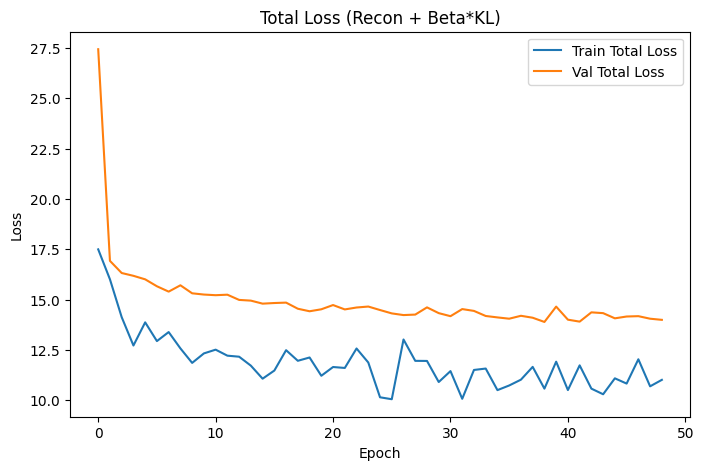

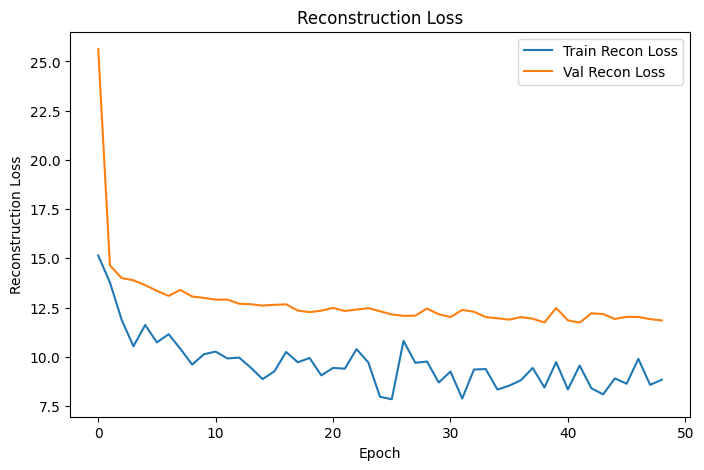

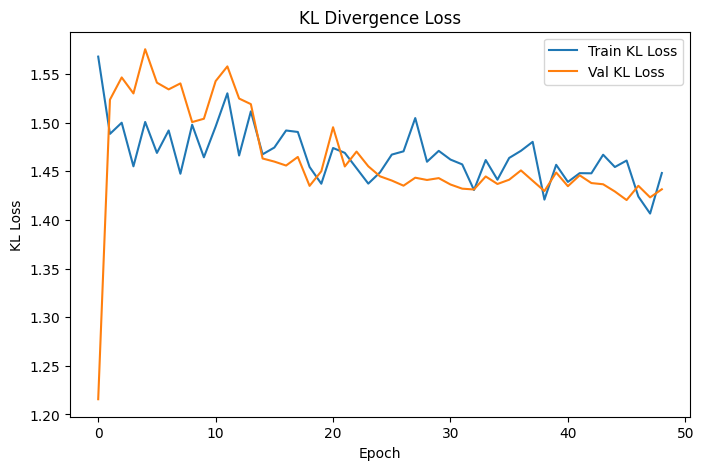

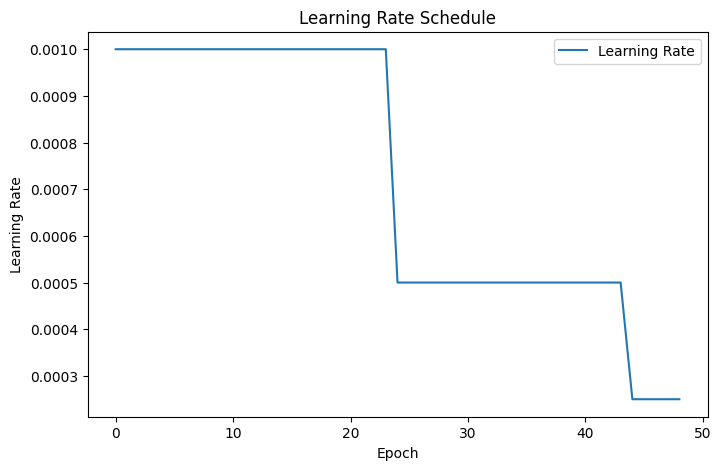

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step


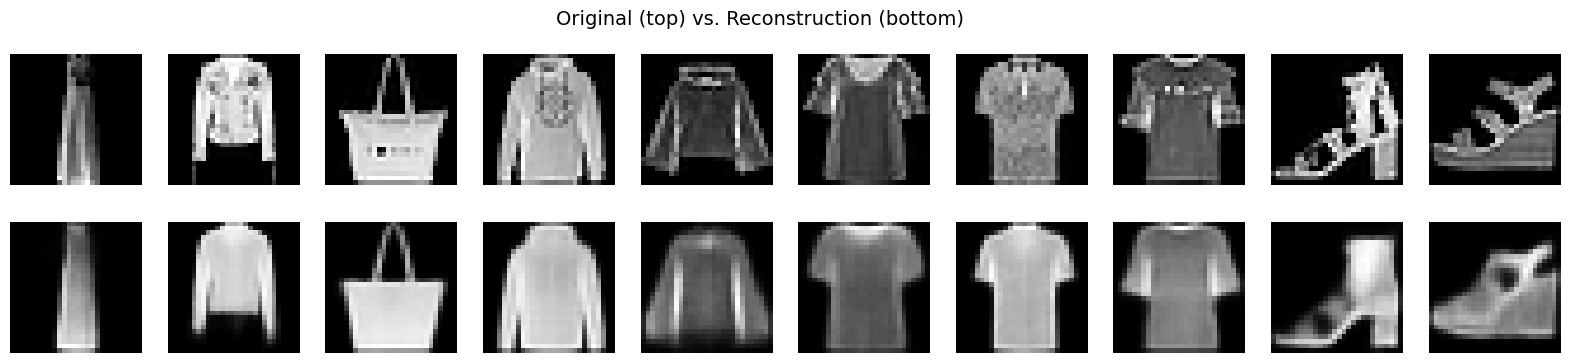

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


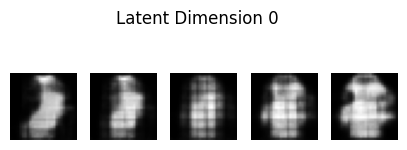

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


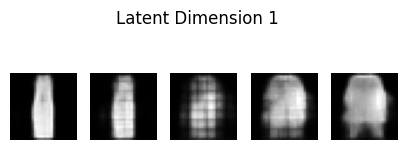

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


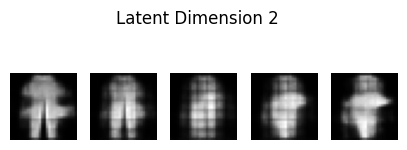

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


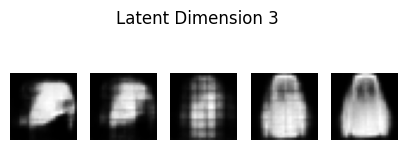

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


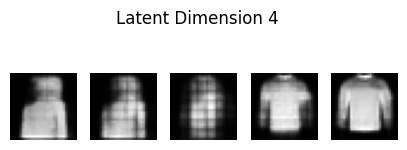

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


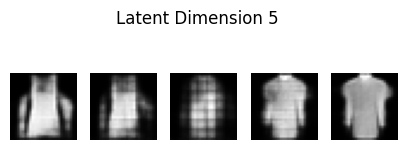

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


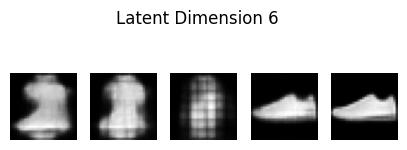

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


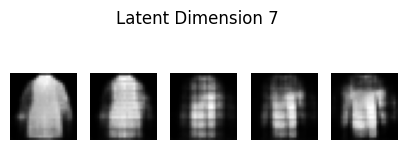

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


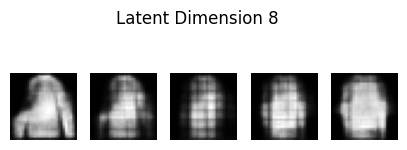

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


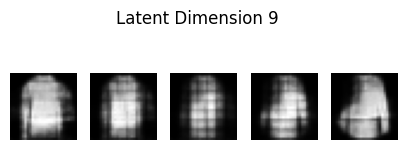

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


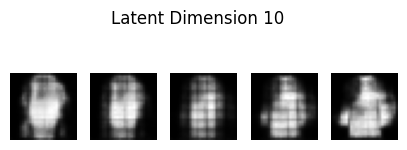

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


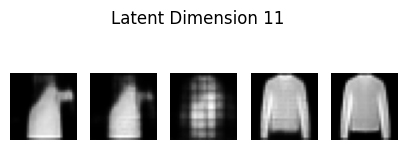

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


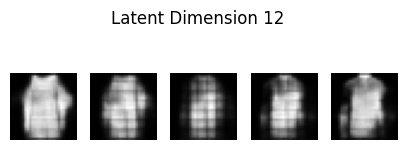

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


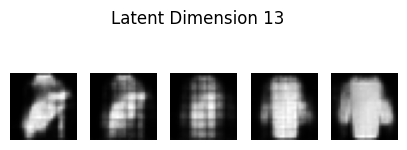

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


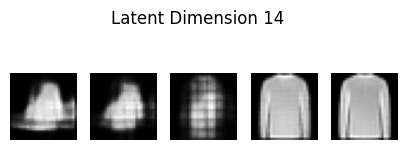

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


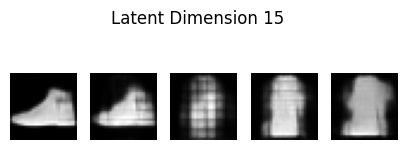

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


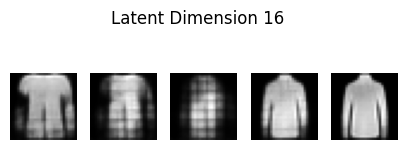

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


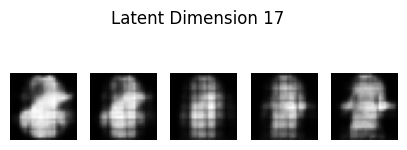

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


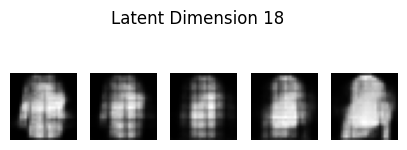

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


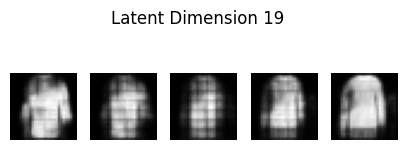

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


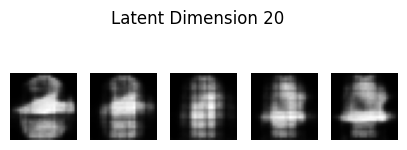

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


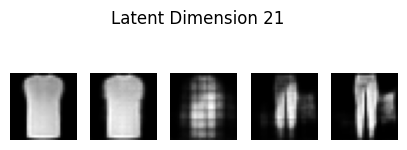

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


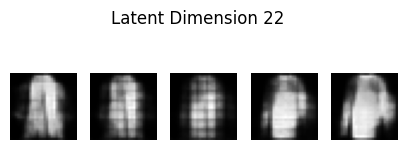

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


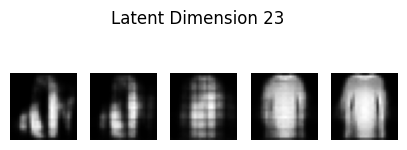

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


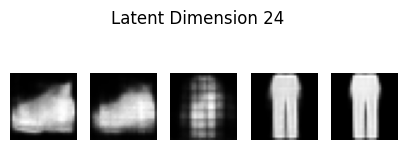

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


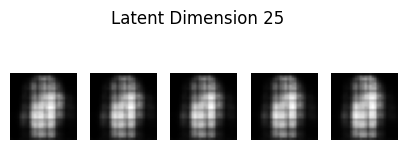

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


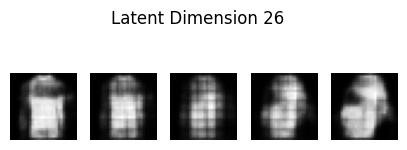

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


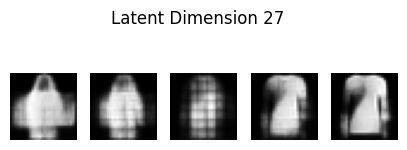

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


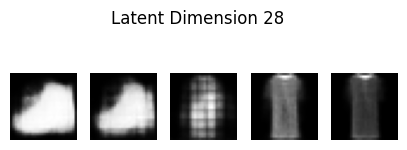

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


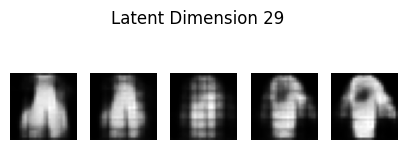

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


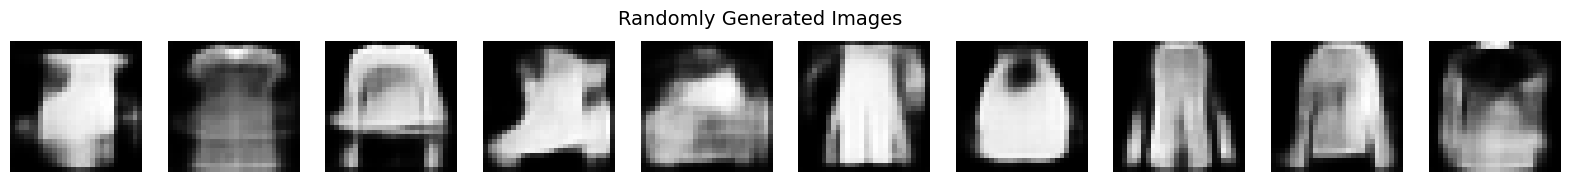

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 253ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 253ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Inception Score: 1.0001317262649536 ± 1.2262748896318953e-05
Average SSIM: 0.7835
Average PSNR: 21.35 dB
MSE: 0.0090
MAE: 0.0479
FID Score: 0.4863
Classification Accuracy on Reconstructed Images: 0.8540
Mean Diversity: 10.797595024108887, Min Diversity: 2.0484256744384766
Coverage: 0.0180


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Для SSIM/PSNR (pip install scikit-image за потреби):
from skimage.metrics import structural_similarity as ssim_metric
from skimage.metrics import peak_signal_noise_ratio as psnr_metric

##############################################################################
# 1. Завантаження та підготовка даних (Fashion MNIST)
##############################################################################
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Додаємо вимір каналу
x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

print("Розмір тренувального набору:", x_train.shape)
print("Розмір тестового набору:", x_test.shape)


##############################################################################
# 2. Налаштування основних гіперпараметрів
##############################################################################
LATENT_DIM = 30           # Більший латентний простір
EPOCHS = 50               # 50 епох
BATCH_SIZE = 128
ACTIVATION_TYPE = "leaky_relu"  # Можна "relu" або "leaky_relu"
RECONSTRUCTION_LOSS = "mse"     # "mse" або "binary_crossentropy"
BETA = 1.5                # \beta для \beta-VAE
LEARNING_RATE = 1e-3      # Початковий LR
DROP_RATE = 0.3           # Для Dropout


##############################################################################
# 3. Функція для вибору шару активації (ReLU / LeakyReLU)
##############################################################################
def get_activation_layer():
    if ACTIVATION_TYPE == "leaky_relu":
        return layers.LeakyReLU(alpha=0.2)
    else:
        return layers.ReLU()


##############################################################################
# 4. Шар Sampling
##############################################################################
class Sampling(layers.Layer):
    """z = mean + exp(0.5*log_var)*epsilon."""
    def call(self, inputs):
        mean, log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(mean))
        return mean + tf.exp(0.5 * log_var) * epsilon


##############################################################################
# 5. Побудова Глибокого Енкодера
##############################################################################
def build_encoder(input_shape=(28, 28, 1), latent_dim=30):
    encoder_inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, 3, strides=2, padding='same')(encoder_inputs)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)
    x = layers.Dropout(DROP_RATE)(x)

    x = layers.Conv2D(64, 3, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)
    x = layers.Dropout(DROP_RATE)(x)

    x = layers.Conv2D(128, 3, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)
    x = layers.Dropout(DROP_RATE)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)
    x = layers.Dropout(DROP_RATE)(x)

    # Параметри латентного простору
    z_mean = layers.Dense(latent_dim, name='z_mean')(x)
    z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

    # Семплювання
    z = Sampling()([z_mean, z_log_var])

    return keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")


##############################################################################
# 6. Побудова Глибокого Декодера
##############################################################################
def build_decoder(latent_dim=30):
    latent_inputs = keras.Input(shape=(latent_dim,))

    x = layers.Dense(7 * 7 * 128)(latent_inputs)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)
    x = layers.Dropout(DROP_RATE)(x)

    x = layers.Reshape((7, 7, 128))(x)

    x = layers.Conv2DTranspose(128, 3, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)

    x = layers.Conv2DTranspose(64, 3, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)

    x = layers.Conv2DTranspose(32, 3, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = get_activation_layer()(x)

    # Вихід: 1 канал, сигмоїд
    decoder_outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

    return keras.Model(latent_inputs, decoder_outputs, name="decoder")


##############################################################################
# 7. \beta-VAE (кастомна модель)
##############################################################################
class BetaVAE(keras.Model):
    def __init__(self, encoder, decoder, recon_loss_type="mse", beta=1.0, **kwargs):
        super(BetaVAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.recon_loss_type = recon_loss_type
        self.beta = beta

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data, training=True)
            reconstruction = self.decoder(z, training=True)

            # Реконструктивна втрата
            if self.recon_loss_type == "mse":
                recon_loss = tf.reduce_mean(
                    tf.reduce_sum(tf.square(data - reconstruction), axis=[1,2,3])
                )
            else:
                recon_loss = tf.reduce_mean(
                    keras.losses.binary_crossentropy(data, reconstruction)
                )
                recon_loss *= 28 * 28

            # KL-дивергенція
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(kl_loss) * -0.5

            # \beta-VAE
            total_loss = recon_loss + self.beta * kl_loss

        grads = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

        return {
            "loss": total_loss,
            "recon_loss": recon_loss,
            "kl_loss": kl_loss,
        }

    def test_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        z_mean, z_log_var, z = self.encoder(data, training=False)
        reconstruction = self.decoder(z, training=False)

        if self.recon_loss_type == "mse":
            recon_loss = tf.reduce_mean(
                tf.reduce_sum(tf.square(data - reconstruction), axis=[1,2,3])
            )
        else:
            recon_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            recon_loss *= 28 * 28

        kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        kl_loss = tf.reduce_mean(kl_loss) * -0.5

        total_loss = recon_loss + self.beta * kl_loss

        return {
            "loss": total_loss,
            "recon_loss": recon_loss,
            "kl_loss": kl_loss,
        }

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        return self.decoder(z)


##############################################################################
# 8. Створюємо екземпляри Encoder/Decoder та VAE
##############################################################################
encoder = build_encoder(input_shape=(28, 28, 1), latent_dim=LATENT_DIM)
decoder = build_decoder(latent_dim=LATENT_DIM)

vae = BetaVAE(
    encoder,
    decoder,
    recon_loss_type=RECONSTRUCTION_LOSS,
    beta=BETA  # \beta
)

# Використовуємо Adam з початковим LR
vae.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss=None
)


##############################################################################
# 9. Замість експоненційного шедулера - ReduceLROnPlateau
##############################################################################
# Знижує LR у 2 рази (factor=0.5), якщо 5 епох поспіль немає поліпшення val_loss.
# min_lr обмежує падіння швидкості навчання, щоб вона не впала до 0.
lr_callback = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1,     # щоб бачити повідомлення про зниження
    min_lr=1e-4     # Збільшили min_lr до 1e-4, щоб уникнути занадто малих значень
)

# Додамо LearningRatePrinter
class LearningRatePrinter(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.learning_rate
        # Якщо learning rate є графічним (e.g., schedules), обчисліть його
        if isinstance(lr, tf.keras.optimizers.schedules.LearningRateSchedule):
            # Отримуємо поточну ітерацію
            current_step = self.model.optimizer.iterations
            lr = lr(current_step)
            lr = tf.keras.backend.get_value(lr)
        elif isinstance(lr, tf.Variable):
            lr = tf.keras.backend.get_value(lr)
        else:
            lr = float(lr)
        print(f"Epoch {epoch+1}: Learning rate is {lr:.10f}")

lr_print_callback = LearningRatePrinter()

##############################################################################
# 10. Додавання EarlyStopping для уникнення перенавчання
##############################################################################
early_stop_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)


##############################################################################
# 11. Навчання моделі (50 епох)
##############################################################################
history = vae.fit(
    x_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_test, None),
    callbacks=[lr_callback, lr_print_callback, early_stop_callback]
)


##############################################################################
# 12. Побудова графіків навчання
##############################################################################
plot_study_history(history)
plot_reconstructions(vae, x_test)
plot_latent_traversal(decoder, LATENT_DIM, step=5, range_vals=3)
plot_random_generation(decoder, LATENT_DIM, n=10)

##############################################################################
# 13. Оцінка: метрики
##############################################################################

evaluate_all_metrics(
    vae, encoder, decoder, x_test, y_test, num_samples=1000
)


**Оцінка метрик:**

1. **Inception Score (IS): 1.0001 ± 0.00001**  
   Дуже низьке значення. Це вказує на слабку різноманітність і низьку якість згенерованих зображень.  

2. **Average SSIM: 0.7835**  
   Прийнятне значення, що вказує на збереження структурних подібностей між оригіналом і реконструкцією.  

3. **Average PSNR: 21.35 dB**  
   Середній рівень, що свідчить про помітну втрату якості при реконструкції.  

4. **MSE: 0.0090, MAE: 0.0479**  
   Помилки в межах прийнятного рівня, але є простір для зниження, особливо MSE.  

5. **FID Score: 0.4863**  
   Дуже хороший показник для генеративної моделі. Свідчить про високу схожість між розподілом реальних і згенерованих зображень.  

6. **Classification Accuracy: 0.8540**  
   Високий результат. Модель добре зберігає ключові риси, що важливі для класифікації.  

7. **Diversity (Mean: 10.80, Min: 2.05)**  
   Достатня різноманітність, але мінімальна різноманітність вказує, що деякі зображення можуть бути схожими.  

8. **Coverage: 0.0180**  
   Дуже низьке покриття латентного простору. Модель неефективно використовує потенціал латентного простору.

